In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'EMprint'

In [ ]:
import matplotlib
print(matplotlib.__version__)

3.10.5


In [ ]:
daily_throughput = pd.read_csv('data/daily_throughput_3Q.csv')

daily_throughput

,Date,Containers_Imported,Containers_Exported
0,2025-07-01,78,61
1,2025-07-02,74,58
2,2025-07-03,81,64
3,2025-07-04,77,59
4,2025-07-05,0,0
...,...,...,...
87,2025-09-26,80,63
88,2025-09-27,0,0
89,2025-09-28,0,0
90,2025-09-29,85,67


In [29]:
daily_throughput = (daily_throughput
                    .assign(Daily_Throughput=daily_throughput['Containers_Imported'].add(daily_throughput['Containers_Exported']))
                    .assign(Date=lambda df_: pd.to_datetime(df_["Date"]))
                    .pipe(lambda df_: df_.set_index(df_['Date']))
                    .loc[:, ["Containers_Imported", "Containers_Exported", "Daily_Throughput"]])
daily_throughput

,Containers_Imported,Containers_Exported,Daily_Throughput
Date,,,
2025-07-01,78,61,139
2025-07-02,74,58,132
2025-07-03,81,64,145
2025-07-04,77,59,136
2025-07-05,0,0,0
...,...,...,...
2025-09-26,80,63,143
2025-09-27,0,0,0
2025-09-28,0,0,0


Highest daily throughput: 205 containers
On: 2025-08-28 00:00:00


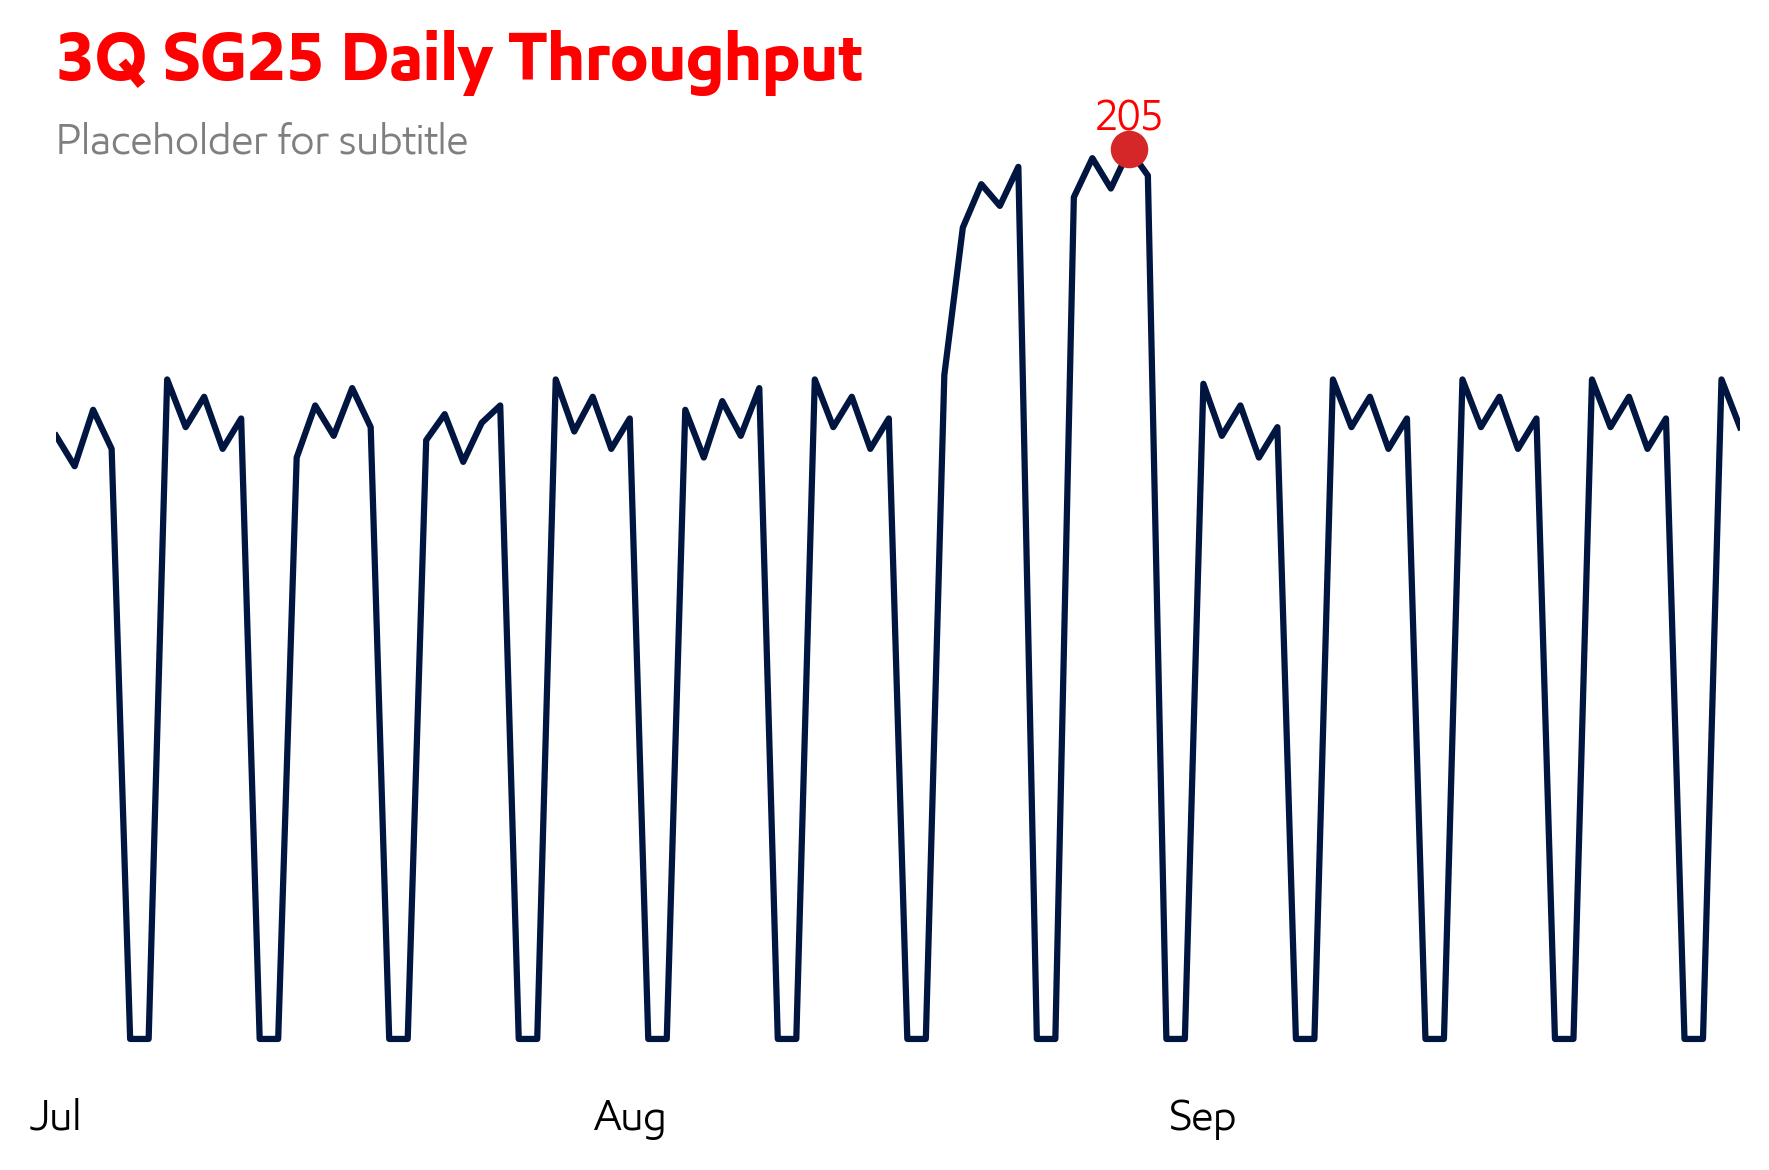

In [31]:
from matplotlib import dates as mdates

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

print(f"Highest daily throughput: {daily_throughput["Daily_Throughput"].max()} containers")
print(f"On: {daily_throughput["Daily_Throughput"].idxmax()}")

ax.plot(daily_throughput.index, 
        daily_throughput['Containers_Imported'].add(daily_throughput['Containers_Exported']), 
        color='#001540')

highlight_x = daily_throughput["Daily_Throughput"].idxmax()
highlight_y = daily_throughput["Daily_Throughput"].max()

ax.plot([highlight_x], 
        [highlight_y], 
        color='#d62728', 
        marker='o', 
        markersize=8)

# ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
for spine in ax.spines.values(): spine.set_visible(False)
ax.grid(False)
ax.set_yticklabels([])
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)

ax.set_xlim(daily_throughput.index.min(), daily_throughput.index.max())
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_title('3Q SG25 Daily Throughput', loc='left', color='red', fontweight='bold', fontsize=16)
ax.text(x=0, y=0.95, s='Placeholder for subtitle', transform=ax.transAxes, color='#7f7f7f')

ax.text(x=highlight_x,  # The actual date Timestamp
        y=highlight_y + 2,
        s=f'{highlight_y}',  # Clean int, no f-string repeat
        ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Text Chart

/var/folders/zx/x3_2llcj0tqd7f6y6p1wdbhr0000gn/T/ipykernel_76616/3457097776.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.0)


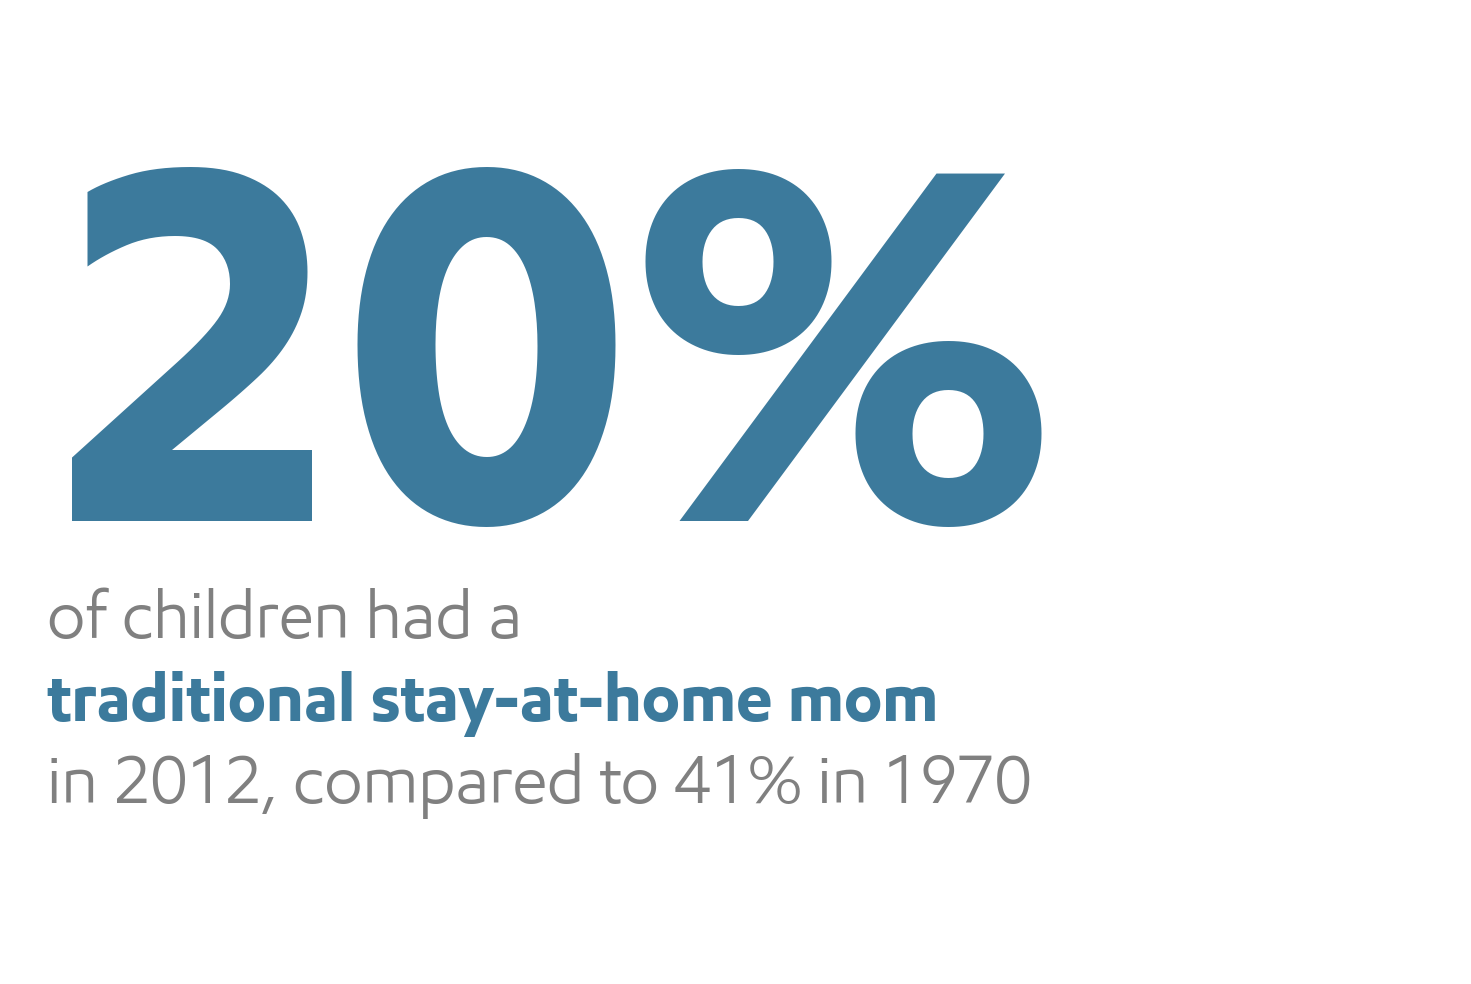

In [32]:
from highlight_text import ax_text, fig_text

layout = [['highlight'],
          ['description']]
fig, ax = plt.subplot_mosaic(layout, gridspec_kw={'height_ratios': [2, 1], 'hspace': 0.02},
                             figsize=(6, 4), constrained_layout=False, dpi=300)

ax_highlight = ax['highlight']
for spine in ax_highlight.spines.values(): spine.set_visible(False)
ax_highlight.grid(False)
ax_highlight.set_yticklabels([])
ax_highlight.set_xticklabels([])
ax_highlight.tick_params(axis='y', length=0)
ax_highlight.tick_params(axis='x', length=0)

ax_highlight.text(0.0, 0.8, '20%', fontsize=120, ha='left', va='top',
                  color='#3c7a9c', weight='bold', transform=ax_highlight.transAxes)

ax_description = ax['description']
for spine in ax_description.spines.values(): spine.set_visible(False)
ax_description.grid(False)
ax_description.set_yticklabels([])
ax_description.set_xticklabels([])
ax_description.tick_params(axis='y', length=0)
ax_description.tick_params(axis='x', length=0)

ax_text(0.0, 1.2,  # Adjusted y for top alignment within bounds
        'of children had a \n<traditional stay-at-home mom>\nin 2012, compared to 41% in 1970',
        fontsize=16, ha='left', va='top', color='gray', 
        ax=ax_description,  
        transform=ax_description.transAxes, linespacing=1.2,
        highlight_textprops=[{'color': '#3c7a9c', 'weight': 'bold'}])

fig.tight_layout(pad=0.0)

plt.show()

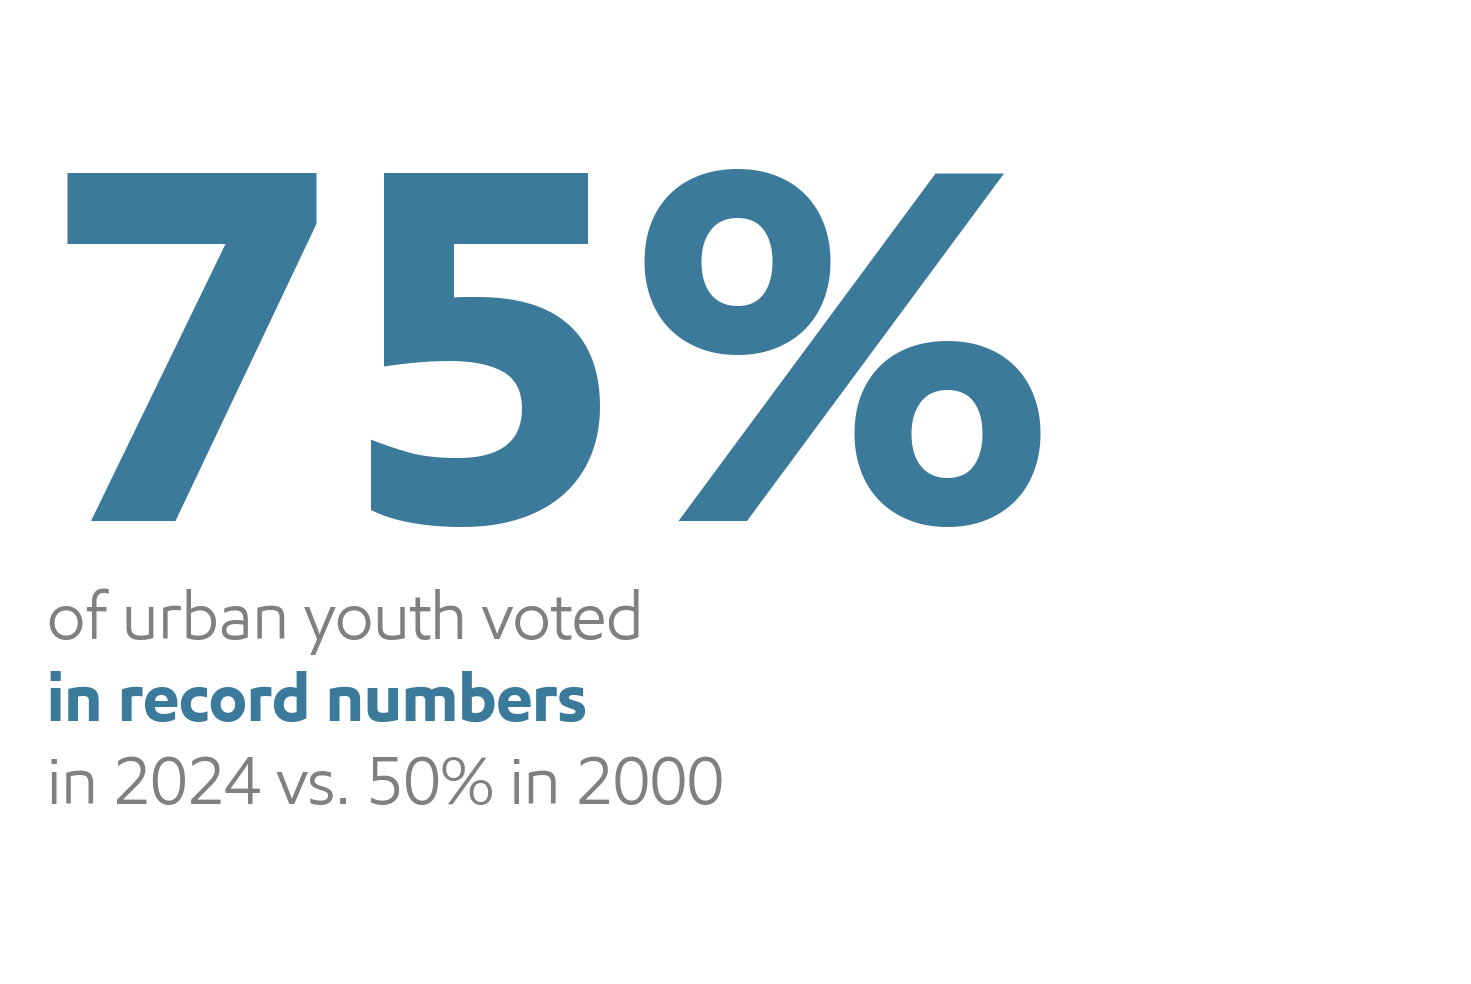

In [33]:
import matplotlib.pyplot as plt
from highlight_text import ax_text

def clean_ax(ax):
    """Strip axes to a blank canvas for text focus."""
    for spine in ax.spines.values(): spine.set_visible(False)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis='y', length=0)
    ax.tick_params(axis='x', length=0)

def create_highlight_viz(big_text='20%', big_fontsize=120, big_color='#3c7a9c',
                         description_text='of children had a \n<traditional stay-at-home mom>\nin 2012, compared to 41% in 1970',
                         desc_fontsize=16, desc_color='gray',
                         highlight_textprops=[{'color': '#3c7a9c', 'weight': 'bold'}],
                         height_ratios=[2, 1], hspace=0.02, figsize=(6, 4), dpi=300):
    """
    Create a two-panel highlight viz: Big number up top, styled description below.
    
    Returns fig, ax dict for further customization.
    """
    layout = [['highlight'], ['description']]
    fig, ax = plt.subplot_mosaic(layout, gridspec_kw={'height_ratios': height_ratios, 'hspace': hspace},
                                 figsize=figsize, constrained_layout=False, dpi=dpi)
    
    # Prep highlight axis
    ax_highlight = ax['highlight']
    clean_ax(ax_highlight)
    ax_highlight.text(0.0, 0.8, big_text, fontsize=big_fontsize, ha='left', va='top',
                      color=big_color, weight='bold', transform=ax_highlight.transAxes)
    
    # Prep description axis
    ax_description = ax['description']
    clean_ax(ax_description)
    ax_text(0.0, 1.2, description_text, fontsize=desc_fontsize, ha='left', va='top',
            color=desc_color, ax=ax_description, transform=ax_description.transAxes,
            linespacing=1.2, highlight_textprops=highlight_textprops)
    
    return fig, ax

# Or adapt: E.g., for a new story
fig, ax = create_highlight_viz(big_text='75%',
                               description_text='of urban youth voted\n<in record numbers>\nin 2024 vs. 50% in 2000')

plt.show()

# Waffle Chart

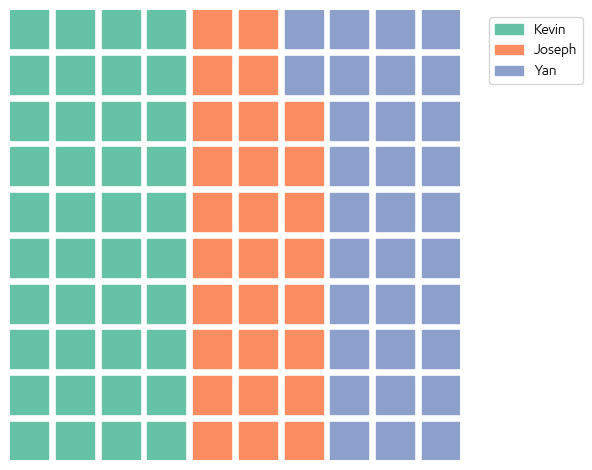

In [44]:
# useful libraries, including pyWaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

# create simple dummy data
data = {'Kevin': 10, 'Joseph': 7, 'Yan': 8}

# Basic waffle
plt.figure(
  FigureClass=Waffle,
  rows=10,
  columns=10,
  values=data,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

/var/folders/zx/x3_2llcj0tqd7f6y6p1wdbhr0000gn/T/ipykernel_76616/2243310525.py:81: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()  # Auto-pad for clean edges


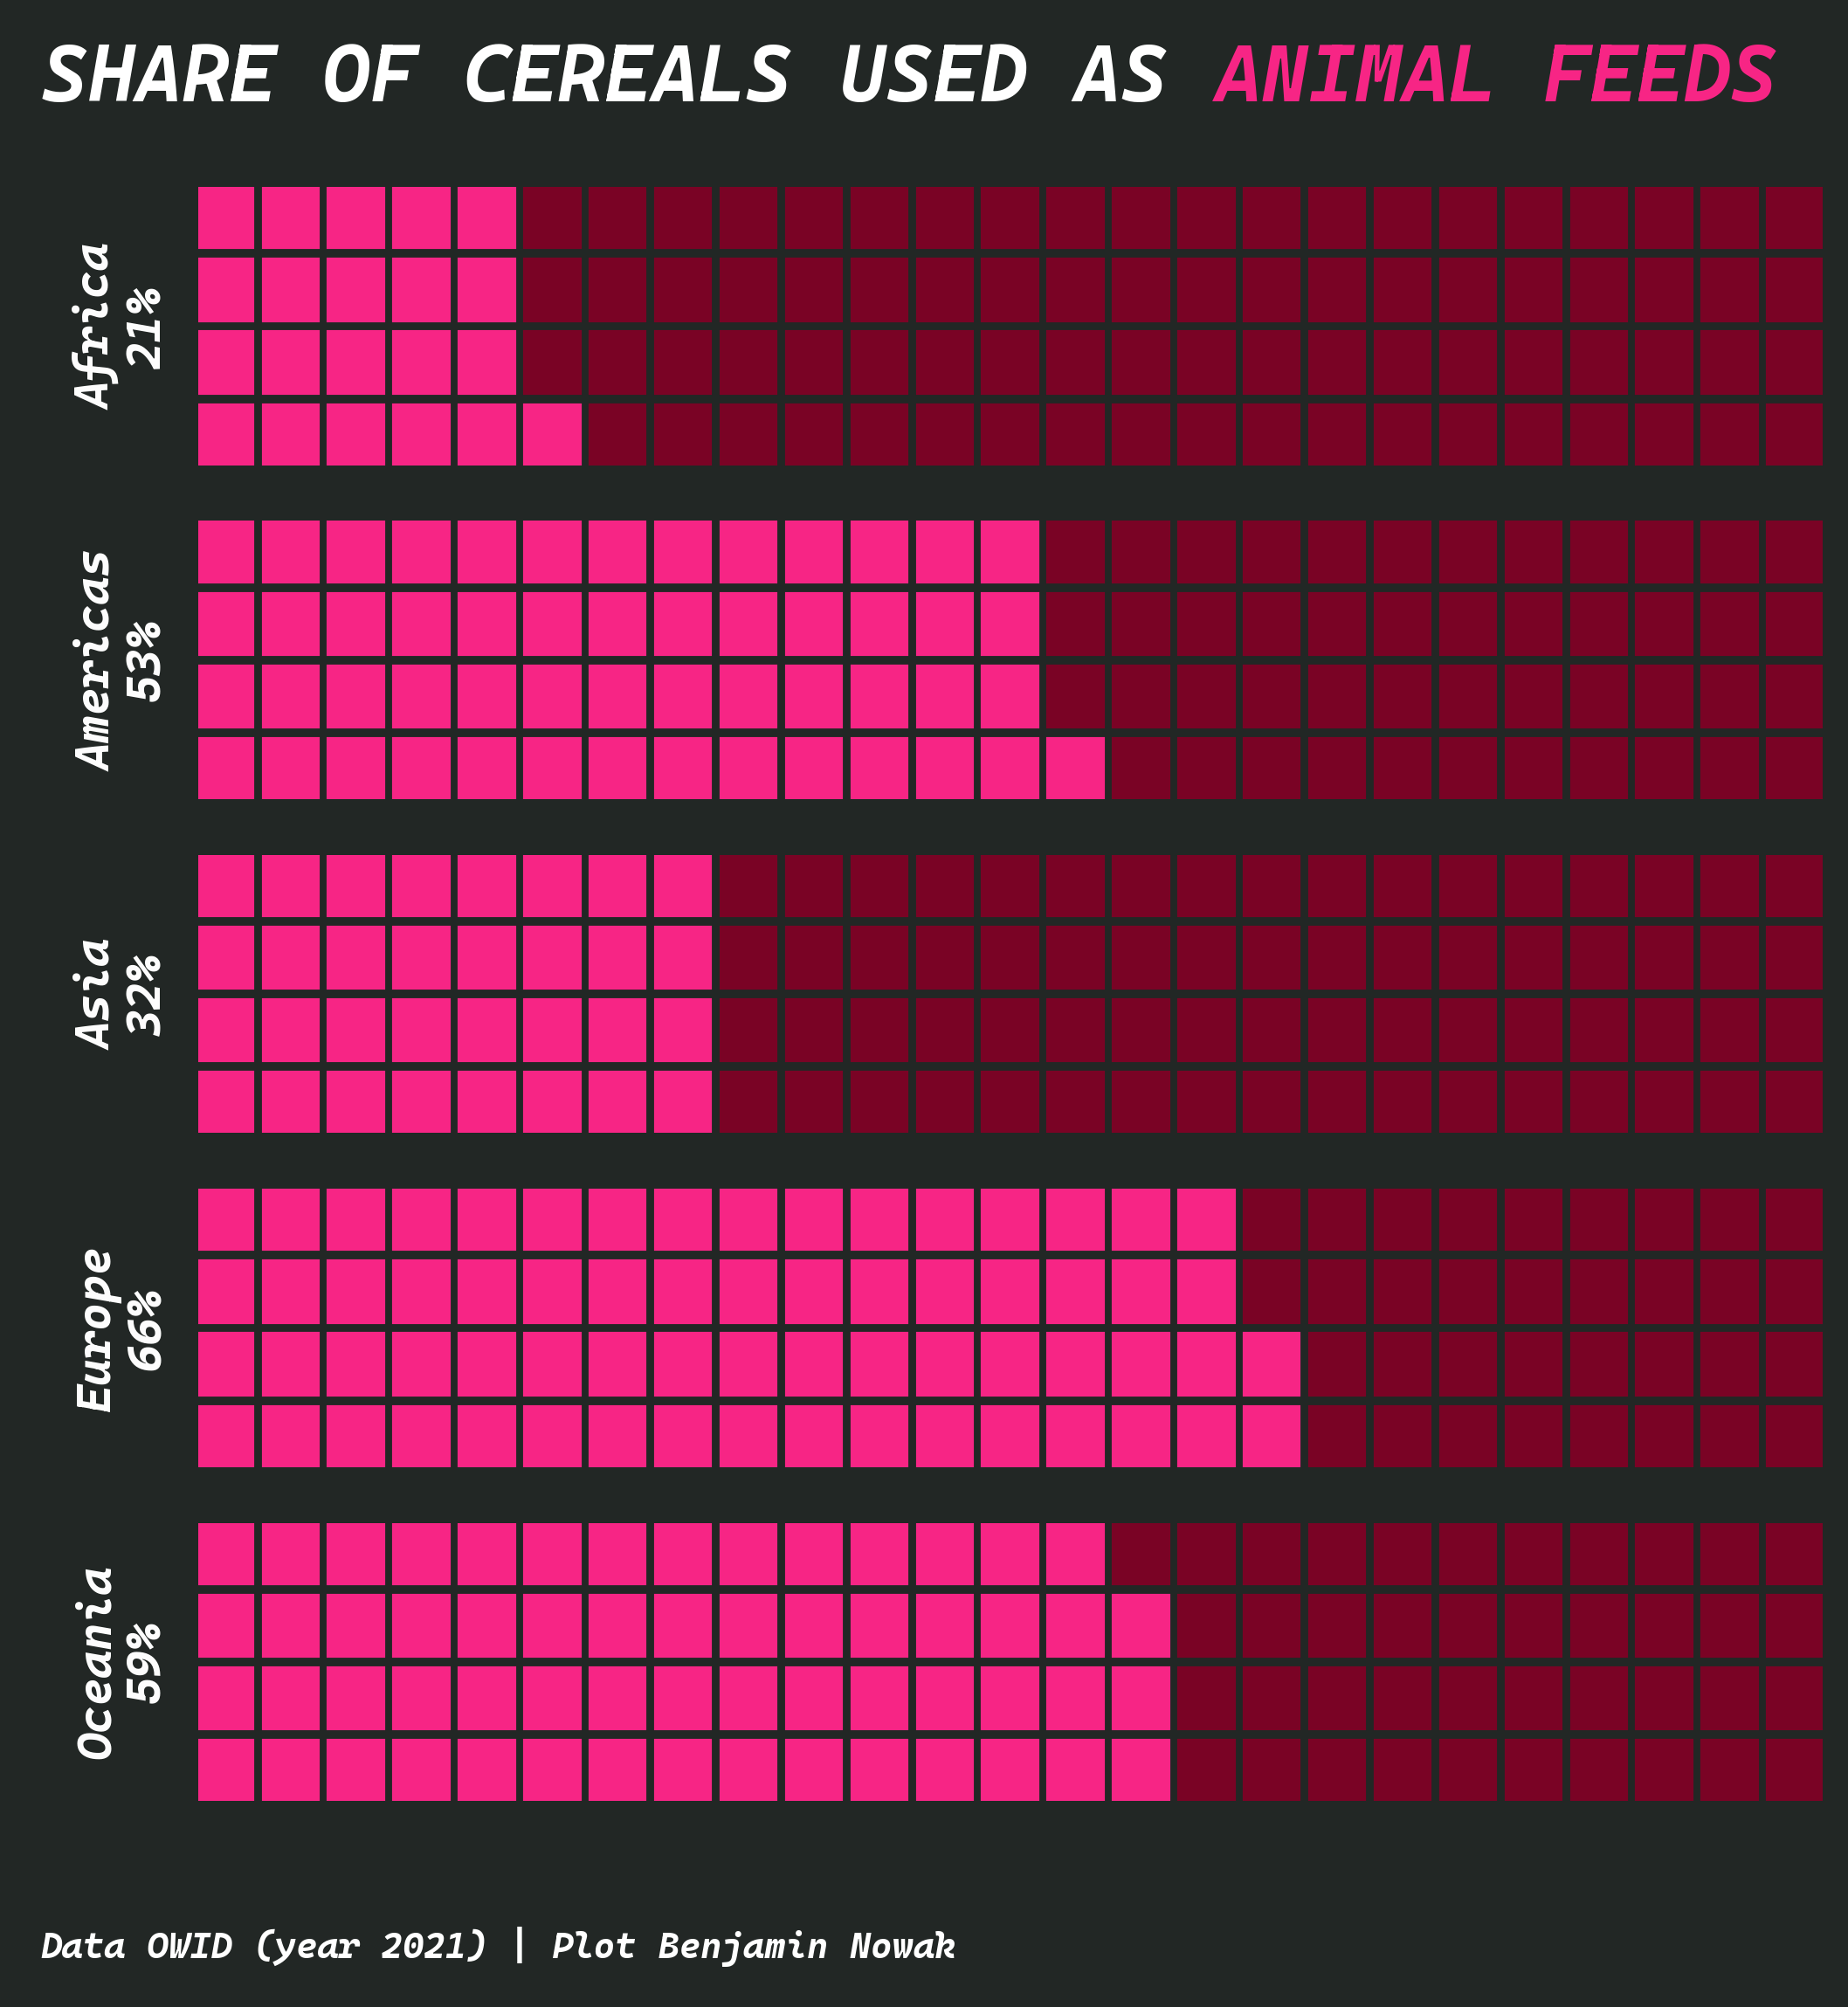

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
from highlight_text import fig_text
from pyfonts import load_google_font

def remove_html_tag(s):
    """Strip <b> tags from labels."""
    return s.split('</b>')[0][3:]

def create_waffle_chart(path=None, df=None, title="SHARE OF CEREALS USED AS <ANIMAL FEEDS>",
                        credit="<Data> OWID (year 2021) | <Plot> Benjamin Nowak",
                        rows=4, columns=25, height_ratios=None, figsize=(8, 8), dpi=300,
                        background_color="#222725", positive_color="#f72585", negative_color="#7a0325",
                        font_family="Cascadia Mono", fontsize_title=22, fontsize_label=13,
                        fontsize_credit=10, highlight_color="#f72585", highlight_weight="bold"):
    """
    Create a stacked waffle chart from percentage data, one subplot per row.
    
    Args:
        path (str): CSV URL/path to load data. If None, use df.
        df (pd.DataFrame): Data with 'lab', 'percent', 'type' columns. Filters to 'type'=='feed'.
        title (str): Figure title with <highlight> tags.
        credit (str): Bottom credit with <highlight> tags.
        rows/columns (int): Waffle grid size.
        height_ratios (list): Subplot heights (default: equal).
        ... (styling): Colors, fonts, sizes for customization.
    
    Returns:
        fig: Matplotlib figure for further tweaks (e.g., savefig).
    
    Example:
        fig = create_waffle_chart(path='https://raw.githubusercontent.com/holtzy/R-graph-gallery/master/DATA/share-cereals.csv')
        plt.show()
    """
    # Load and clean data
    if df is None:
        if path is None:
            raise ValueError("Provide path or df.")
        df = pd.read_csv(path)
    df['lab'] = df['lab'].apply(remove_html_tag)
    df = df[df['type'] == 'feed'].reset_index(drop=True)
    number_of_bars = len(df)
    if number_of_bars == 0:
        raise ValueError("No data after filtering 'type'=='feed'.")

    # Load fonts (once)
    font_title = load_google_font(font_family, weight="bold", italic=True)
    font_credit = font_title  # Reuse for simplicity; customize if needed
    bold_font_credit = font_title

    # Init figure
    if height_ratios is None:
        height_ratios = [1] * number_of_bars
    fig, axs = plt.subplots(nrows=number_of_bars, ncols=1, figsize=figsize, dpi=dpi)
    if number_of_bars == 1:
        axs = [axs]  # Handle single subplot
    fig.set_facecolor(background_color)

    # Build waffles
    for (i, row), ax in zip(df.iterrows(), axs):
        ax.set_facecolor('white')  # Fixed: Per-axis background
        share = row['percent']
        values = [share, 100 - share]
        Waffle.make_waffle(
            ax=ax, rows=rows, columns=columns, values=values,
            colors=[positive_color, negative_color]
        )
        # Labels (rotated)
        ax.text(x=-0.4, y=0.5, s=row['lab'], fontproperties=font_credit, color='white',
                rotation=90, ha='center', va='center', fontsize=fontsize_label)
        ax.text(x=-0.2, y=0.5, s=f"{share}%", fontproperties=font_credit, color='white',
                rotation=90, ha='center', va='center', fontsize=fontsize_label)

    # Title and credit
    fig_text(x=0.05, y=0.95, s=title, highlight_textprops=[{'color': highlight_color}],
             color='white', fontsize=fontsize_title, fontproperties=font_title)
    fig_text(x=0.05, y=0.05, s=credit, fontproperties=font_credit, color="white",
             fontsize=fontsize_credit, highlight_textprops=[{'fontproperties': bold_font_credit}] * 2)

    plt.tight_layout()  # Auto-pad for clean edges
    return fig

# Quick test: Your original viz
fig = create_waffle_chart(path='https://raw.githubusercontent.com/holtzy/R-graph-gallery/master/DATA/share-cereals.csv')
plt.show()

# Remix example: Custom data (e.g., market shares)
# custom_df = pd.DataFrame({'lab': ['Tech', 'Retail'], 'percent': [60, 40], 'type': ['feed', 'feed']})
# fig = create_waffle_chart(df=custom_df, title="MARKET <SHARES> BY SECTOR", positive_color="blue")

# Scatter and Line Chart

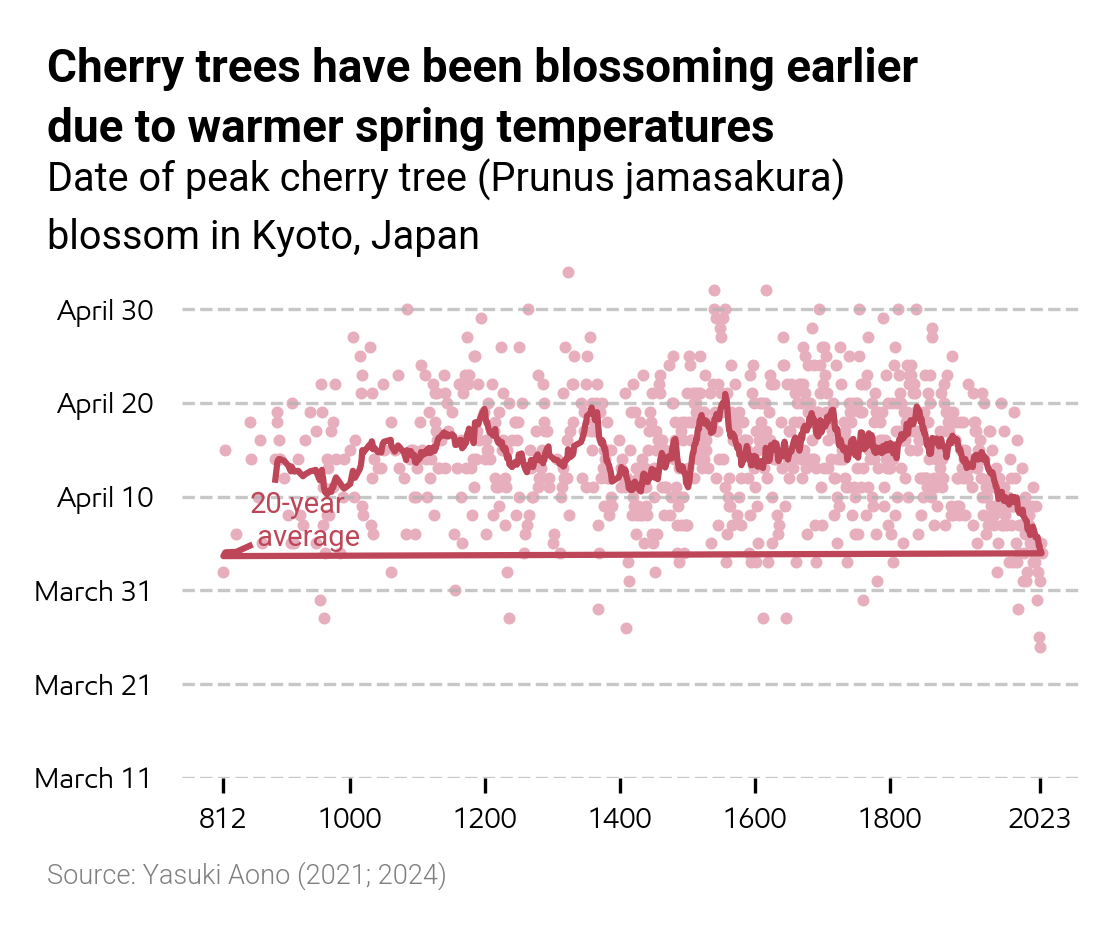

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import ax_text
from pyfonts import load_google_font

cherry_raw = pd.read_csv('data/date-of-the-peak-cherry-tree-blossom-in-kyoto.csv', dtype_backend='pyarrow')

def tweak_cherry(df):
    return (df
            .rename(columns={'Year': 'year',
                             'Day of the year with peak cherry blossom': 'flowering_doy',
                             'Twenty-year average day of the year with peak cherry blossom': 'flowering_MDD'})
            .assign(month=lambda df_: df_['flowering_MDD']//100,
                    day=lambda df_: df_['flowering_MDD'] - (df_['month'] * 100),
                    rolling_doy=lambda df_: df_['flowering_doy'].rolling(window=20).mean())
            .loc[:, ['year', 'month', 'day', 'flowering_doy', 'rolling_doy']])

def plot_cherry(df, ax):
    base_font = load_google_font("Roboto", weight="regular")
    bold_font = load_google_font("Roboto", weight="bold")
    light_font = load_google_font("Roboto", weight="light")
    
    styles = {
        'heading': {'size': 11, 'weight': 'bold'},
        'subheading': {'size': 9.5, 'weight': 'normal'},
        'axis': {'size': 7.5, 'weight': 'normal'},
        'tick': {'size': 7, 'weight': 'light'},
        'source': {'size': 6.5, 'weight': 'light'}
    }
    
    df.plot.scatter(x='year', y='flowering_doy', ax=ax, c='#e7afbe', s=3.5)
    df.plot(x='year', y='rolling', ax=ax, c='#bd4758', linewidth=1.5)
    ax.text(df['year'].iloc[-1], df['rolling'].iloc[-1], '20-year\n average',
            color='#bd4758', fontproperties=base_font, **styles['tick'])
    
    ax_text(550, 148, 'Cherry trees have been blossoming earlier\n'
            'due to warmer spring temperatures',
            fontproperties=bold_font, color='black', va='top', ha='left', ax=ax, **styles['heading'])
    
    ax_text(550, 136, 'Date of peak cherry tree (Prunus jamasakura) \n'
            'blossom in Kyoto, Japan',
            fontproperties=base_font,
            color='black', va='top', ha='left', ax=ax, **styles['subheading'])
    
    for spine in ax.spines.values():
        spine.set_visible(False)
        
    ax.tick_params(axis='y', which='both', left=False)
    
    for label in ax.get_xticklabels():
        label.set_fontsize(styles['tick']['size'])
        label.set_fontweight(styles['tick']['weight'])
    for label in ax.get_yticklabels():
        label.set_fontsize(styles['tick']['size'])
        label.set_fontweight(styles['tick']['weight'])
        
    ax.set_yticks([70, 80, 90, 100, 110, 120])
    ax.set_yticklabels(['March 11', 'March 21', 'March 31', 'April 10',
                        'April 20', 'April 30'])
    
    ax.grid(axis='y', linestyle='--', alpha=.7)
    ax.set_xticks([812, 1000, 1200, 1400, 1600, 1800, 2023])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax_text(550, 58, 'Source: Yasuki Aono (2021; 2024)', fontproperties=light_font, color='grey', va='bottom', ha='left', ax=ax, **styles['source'])
    ax.legend().set_visible(False)
    
    plt.subplots_adjust(left=.15, right=.9, top=.7, bottom=.2)
    
fig, ax = plt.subplots(figsize=(4, 3.5), dpi=300)
(tweak_cherry(cherry_raw)
 .assign(rolling=lambda df_: df_['flowering_doy']
         .rolling(window=20, min_periods=5)
         .mean()
         .interpolate())
 .pipe(plot_cherry, ax=ax))

# Bar Chart

In [145]:
index = ['Engine power is less than expected',
         'Tires make excessive noise while driving',
         'Engine makes abnormal/excessive noise',
         'Seat material concerns',
         'Excessive wind noise',
         'Hesitation or delay when shifting',
         'Bluetooth system has poor sound quality',
         'Steering system/wheel has too much play',
         'Bluetooth system is difficult to use',
         'Front seat audio/entertainment/navigation controls'
]
top10_design_concerns = pd.DataFrame({ 'concerns_per_1000': [12.9, 12.3, 11.6, 11.6, 11.0, 10.3, 10.0, 8.8, 8.6, 8.2]},
                                     index = index)

top10_design_concerns

,concerns_per_1000
Engine power is less than expected,12.9
Tires make excessive noise while driving,12.3
Engine makes abnormal/excessive noise,11.6
Seat material concerns,11.6
Excessive wind noise,11.0
Hesitation or delay when shifting,10.3
Bluetooth system has poor sound quality,10.0
Steering system/wheel has too much play,8.8
Bluetooth system is difficult to use,8.6
Front seat audio/entertainment/navigation controls,8.2


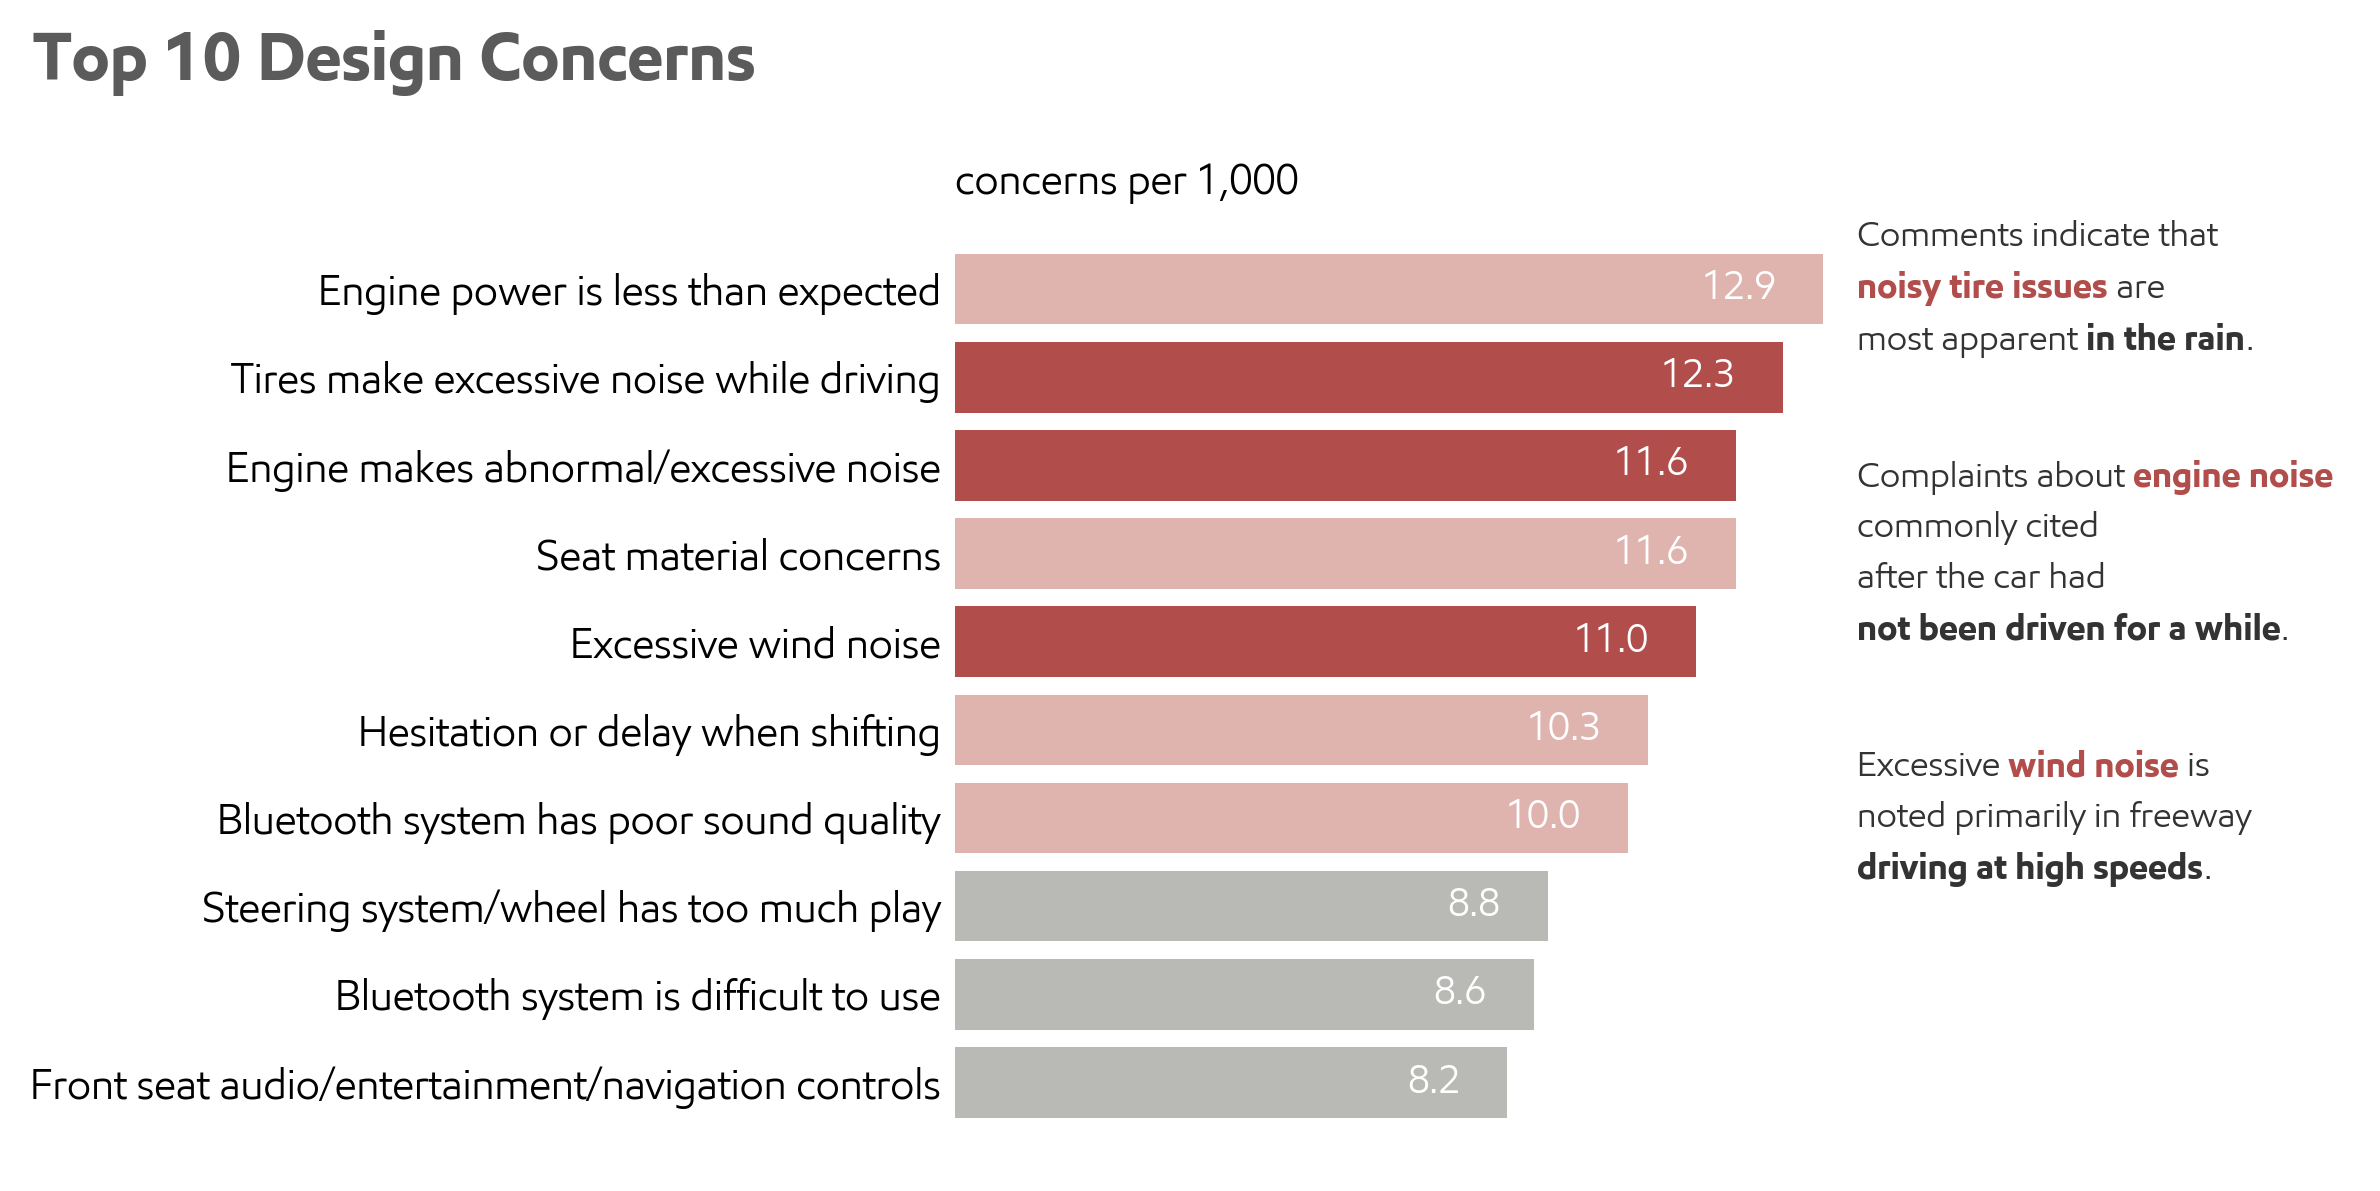

In [238]:
from highlight_text import ax_text

colors = []
for label in top10_design_concerns.index:
    if 'noise' in label.lower():
        colors.append('#b14d4b')
    elif top10_design_concerns.loc[label, 'concerns_per_1000'] >= 10.0:
        colors.append('#dfb4af')
    else:
        colors.append('#b9b9b5')
        
annotations = ['Comments indicate that\n<noisy tire issues> are\nmost apparent <in the rain>.',
               'Complaints about <engine noise>\ncommonly cited\nafter the car had\n<not been driven for a while>.',
               'Excessive <wind noise> is\nnoted primarily in freeway\n<driving at high speeds>.'][::-1]

fig, ax = plt.subplots(figsize=(8, 4), nrows=1, ncols=1, dpi=300,)
ax.barh(y=top10_design_concerns.index,
        width=top10_design_concerns['concerns_per_1000'],
        color=colors,          # Your calm blue
        height=0.8)
ax.invert_yaxis()
fig.suptitle('Top 10 Design Concerns', ha='left', x=0.02, color='#5a5b5a', fontweight='bold', fontsize=16)
for spine in ax.spines.values(): spine.set_visible(False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)
ax.set_xticklabels([])
ax.set_xlabel('concerns per 1,000', loc='left')
ax.xaxis.set_label_position('top')

for bar, value in zip(ax.patches, top10_design_concerns['concerns_per_1000']):
    ax.text(x=bar.get_width()-0.7,
            y=bar.get_y()+bar.get_height()/2,
            s=f'{value}',
            va='center',
            ha='right',
            color='#ffffff', #if bar.get_facecolor() == (0.694, 0.302, 0.294, 1) else '#333333'
            fontsize=9.5,
            )

# Noise annotations: Position near each bar's right end, in data space
noise_indices = [6, 3, 0]
for annot, idx in zip(annotations, noise_indices):
    bar = ax.patches[idx]   # directly get the correct bar
    
    ax_text(
        x=top10_design_concerns['concerns_per_1000'].max()+ 0.5,                    # start just after the bar
        y=bar.get_y() + bar.get_height()/2,   # perfectly centered vertically
        s=annot,
        va='center',
        ha='left',
        fontsize=8.5,
        color='#333333',
        linespacing=1.35,
        highlight_textprops=[{'color': '#b14d4b', 'weight': 'bold'},
                             {'weight': 'bold'}]
    )
    
plt.tight_layout()
plt.show()

In [239]:
import matplotlib.pyplot as plt
import pandas as pd
from highlight_text import ax_text

def hbar(
    df,
    value_col,
    title="Top Concerns",
    xlabel=None,
    highlight_keywords=None,
    highlight_color='#b14d4b',
    high_value_color='#dfb4af',
    low_value_color='#b9b9b5',
    high_value_threshold=10.0,
    annotations=None,           # list of strings (same length as highlighted rows)
    annotation_indices=None,    # list of row indices (in original df order)
    figsize=(8, 4.5),
    dpi=300,
    title_fontsize=16,
    value_fontsize=9.5,
    annotation_fontsize=8.5
):
    """
    Create a beautiful, editorial-style horizontal bar chart with:
    - Conditional bar coloring
    - Values inside bars
    - Optional highlighted annotations (with <highlight> support)
    - Top-aligned xlabel
    - Clean minimalist design
    """
    # Prepare colors
    colors = []
    highlighted_rows = []
    
    for idx, label in enumerate(df.index):
        label_str = str(label).lower()
        value = df.loc[label, value_col]
        
        if highlight_keywords and any(k.lower() in label_str for k in highlight_keywords):
            colors.append(highlight_color)
            highlighted_rows.append(idx)
        elif value >= high_value_threshold:
            colors.append(high_value_color)
        else:
            colors.append(low_value_color)

    # Plot
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    bars = ax.barh(y=df.index, width=df[value_col], color=colors, height=0.8)
    ax.invert_yaxis()

    # Title & xlabel
    fig.suptitle(title, ha='left', x=0.02, fontsize=title_fontsize, 
                 fontweight='bold', color='#5a5b5a')
    if xlabel:
        ax.set_xlabel(xlabel, loc='left', fontsize=10, color='#555555')
        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()

    # Clean frame
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels([])

    # Value labels inside bars
    for bar, val in zip(bars, df[value_col]):
        text_color = 'white' if bar.get_facecolor()[:3] == (0.694, 0.302, 0.294) else '#333333'
        ax.text(
            x=bar.get_width() - 0.7,
            y=bar.get_y() + bar.get_height()/2,
            s=f'{val}',
            va='center', ha='right',
            color=text_color,
            fontsize=value_fontsize,
            fontweight='medium'
        )

    # Annotations (only if provided)
    if annotations and annotation_indices:
        max_val = df[value_col].max()
        for annot, idx in zip(annotations, annotation_indices):
            bar = bars[idx]
            ax_text(
                x=max_val + 0.5,
                y=bar.get_y() + bar.get_height()/2,
                s=annot,
                ha='left', va='center',
                ax=ax,
                fontsize=annotation_fontsize,
                color='#333333',
                linespacing=1.35,
                highlight_textprops=[
                    {'color': highlight_color, 'weight': 'bold'},
                    {'weight': 'bold'}
                ]
            )

    plt.tight_layout()
    return fig, ax

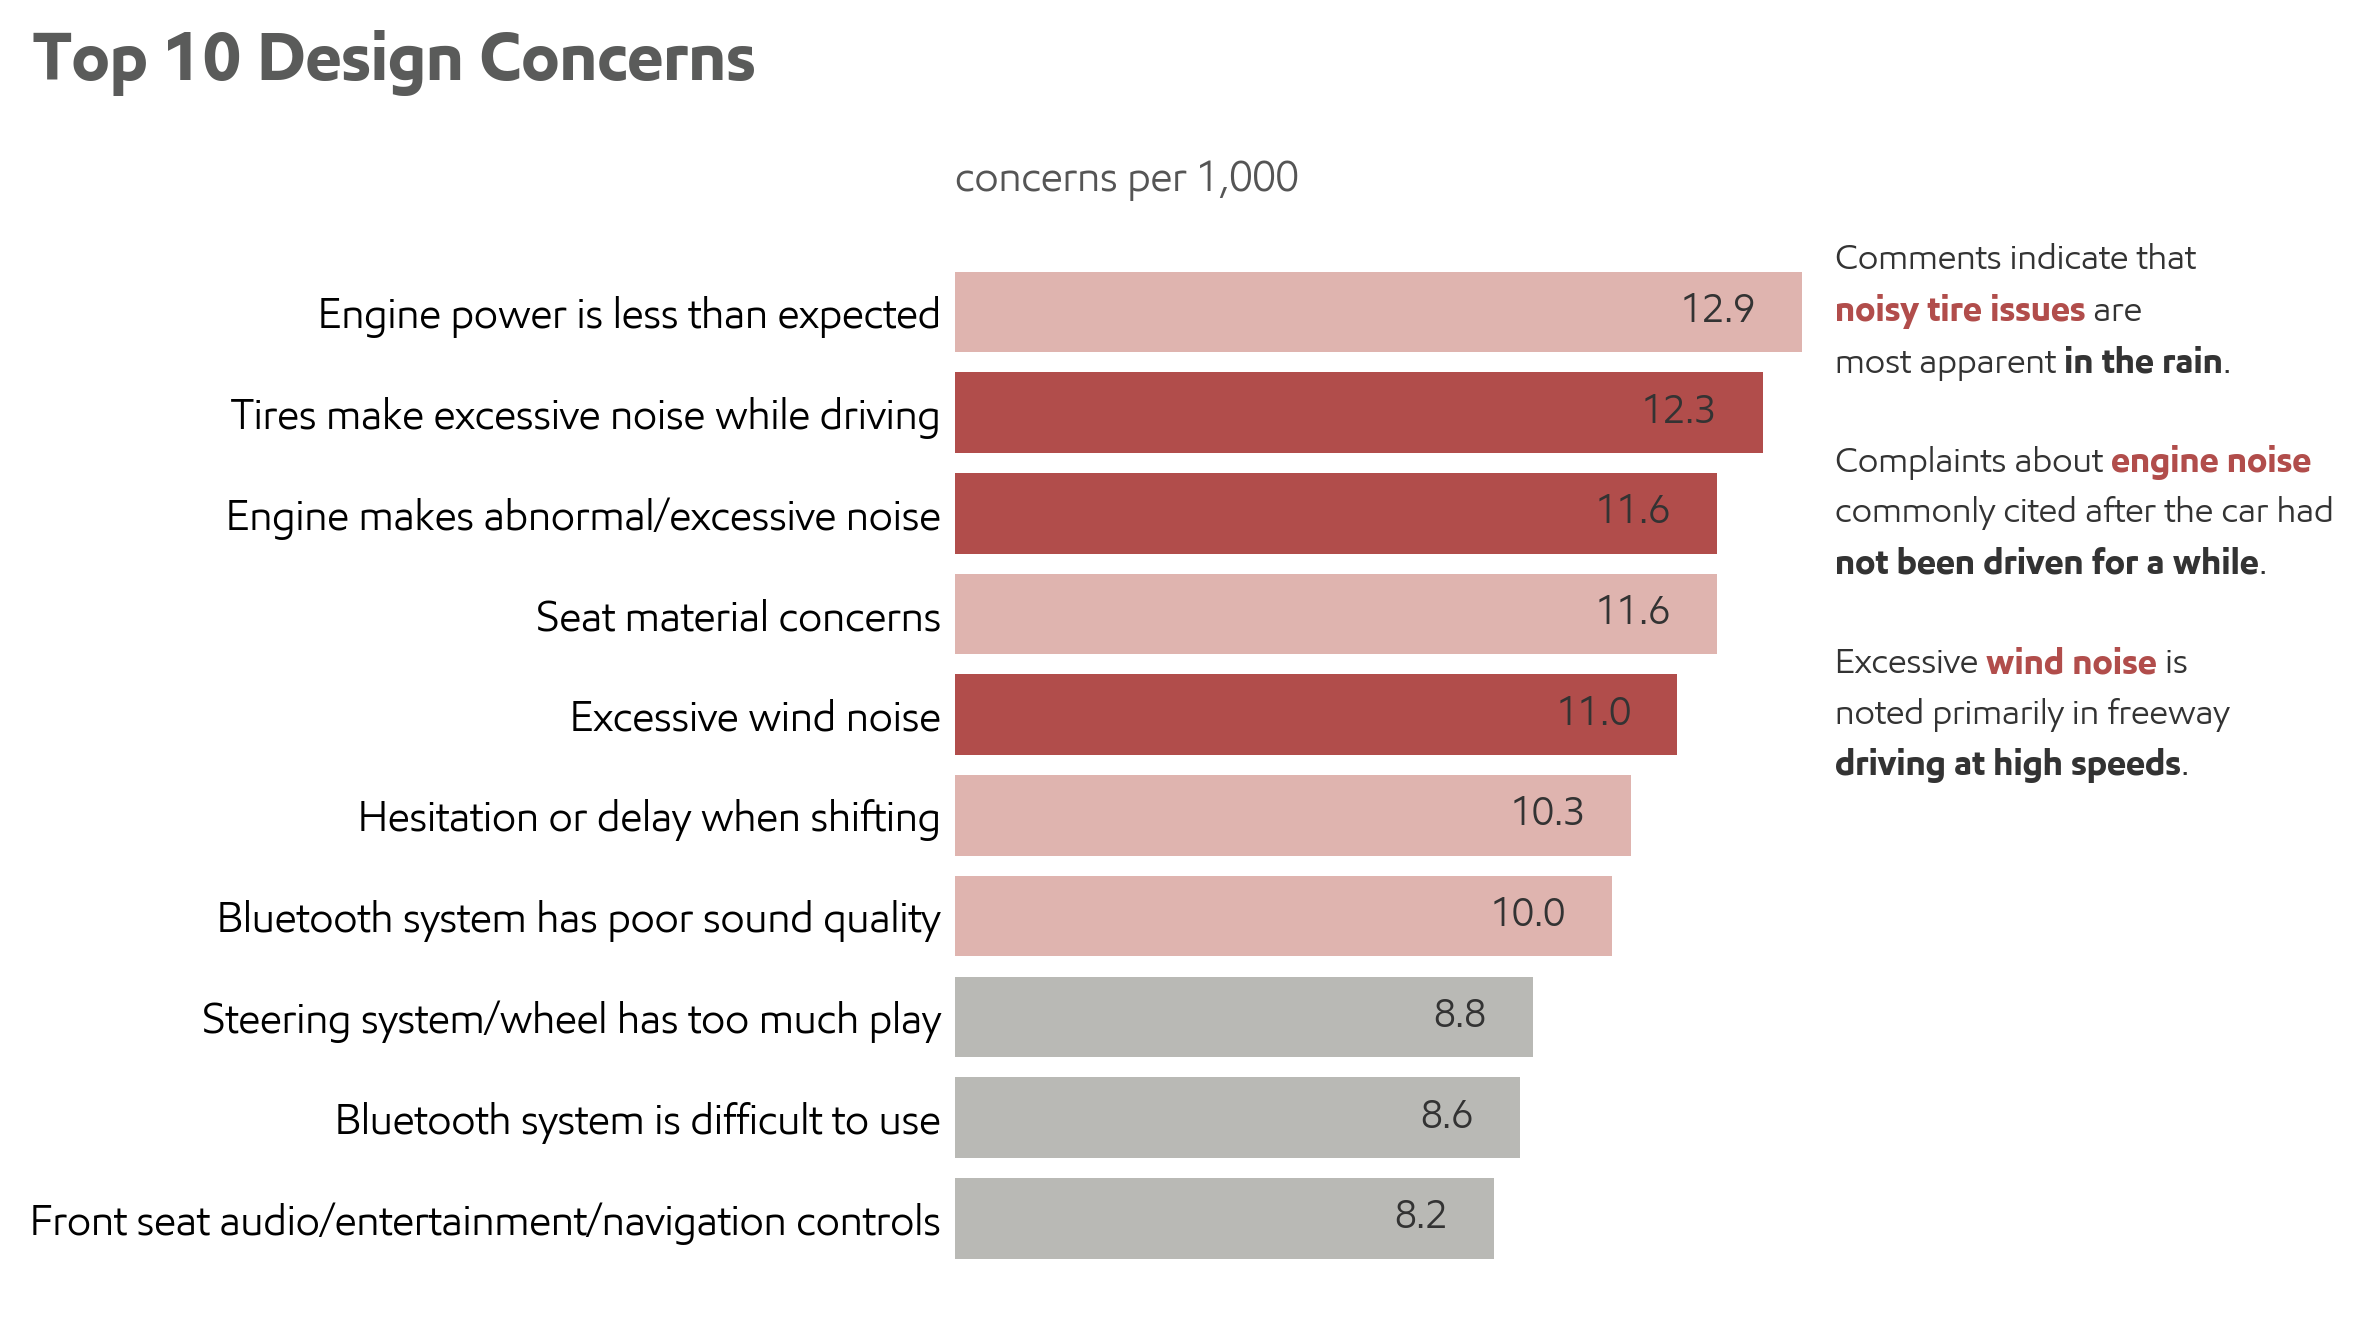

In [242]:
fig, ax = hbar(
    df=top10_design_concerns,
    value_col='concerns_per_1000',
    title='Top 10 Design Concerns',
    xlabel='concerns per 1,000',
    highlight_keywords=['noise'],
    annotations=[
        'Comments indicate that\n<noisy tire issues> are\nmost apparent <in the rain>.',
        'Complaints about <engine noise>\ncommonly cited after the car had\n<not been driven for a while>.',
        'Excessive <wind noise> is\nnoted primarily in freeway\n<driving at high speeds>.'
    ][::-1],
    annotation_indices=[4, 2, 0],   # Tires, Engine noise, Wind noise (original order)
    high_value_threshold=10.0
)
plt.show()

# Slope Chart

                   education  2008  2009  2010  2011  2012
0  Bachelor's degree or more    62    61    60    55    57
1               Some college    43    41    37    37    37
2           High school grad    36    33    32    31    30
3      Less than high school    27    24    22    23    23


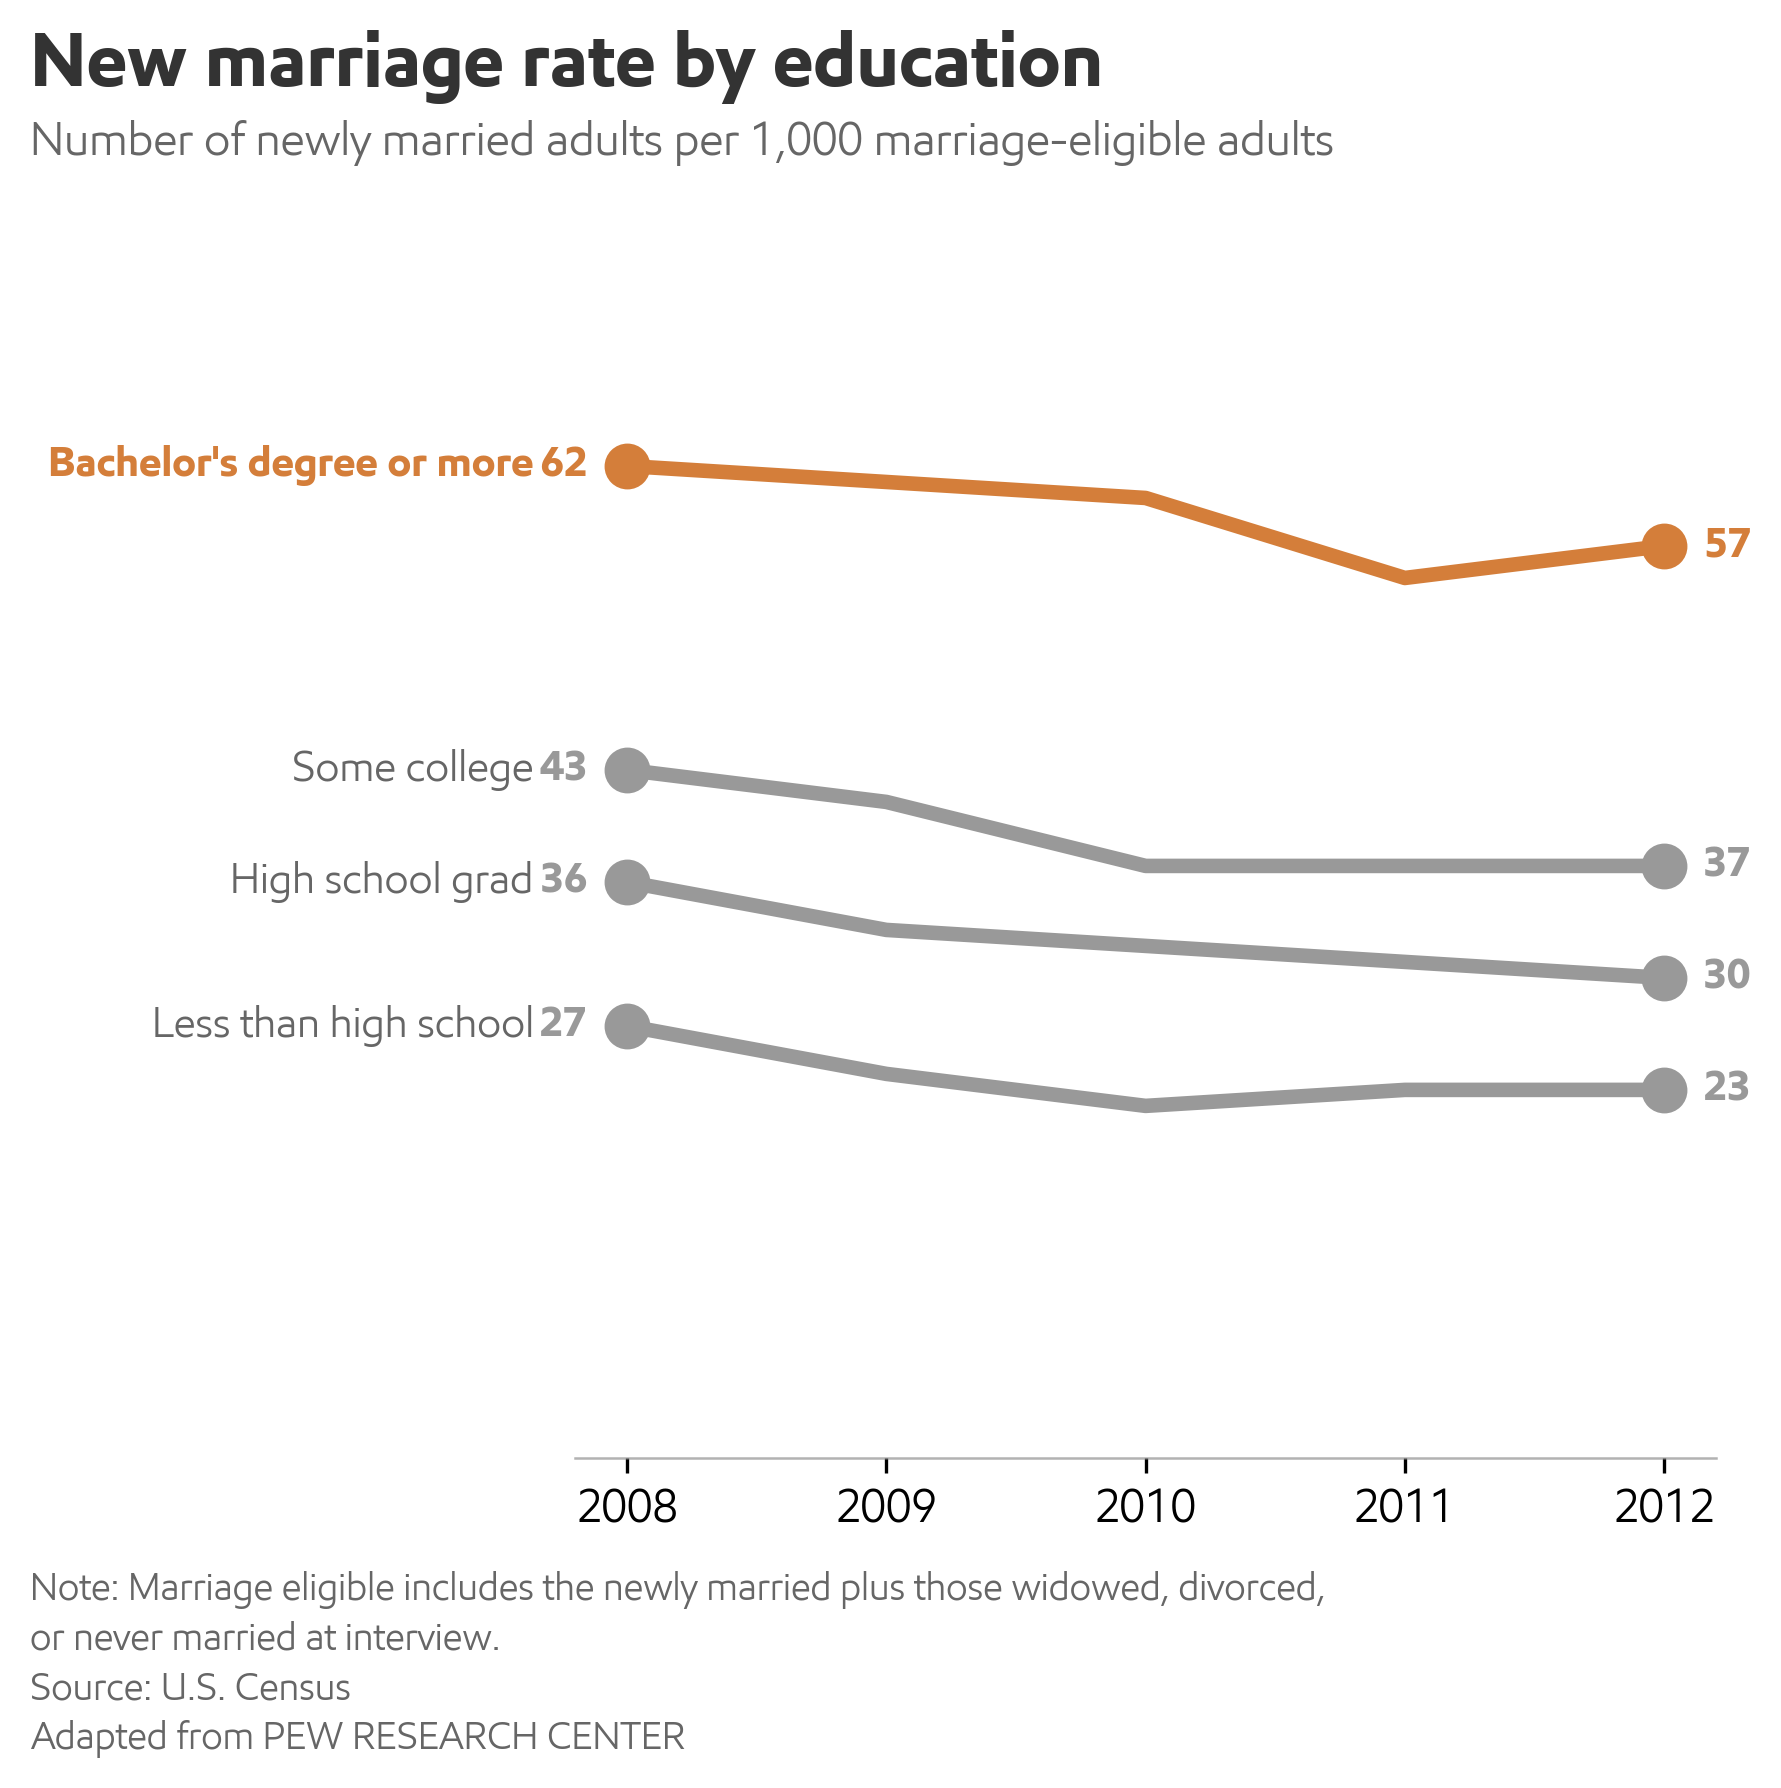

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_slope_chart(data, category_col, year_cols, 
                     title=None, subtitle=None, footer=None,
                     highlight_category=None, 
                     highlight_color='#d47e3a', 
                     base_color='#999999',
                     y_max=None):
    """
    Generates a streamlined slope chart/line plot.
    
    Parameters:
    - data: DataFrame containing the data.
    - category_col: Name of the column containing category names (e.g., 'education').
    - year_cols: List of column names representing the time points (e.g., [2008, ... 2012]).
    - title: Main chart title.
    - subtitle: Chart subtitle.
    - highlight_category: The specific category name to highlight (optional).
    - highlight_color: Color for the highlighted line.
    - base_color: Color for non-highlighted lines.
    - y_max: Optional manual limit for y-axis (to ensure proportional scaling).
    """
    
    # Create a copy and sort by the first year (descending) for visual layering
    df = data.copy()
    df = df.sort_values(year_cols[0], ascending=False).reset_index(drop=True)
    
    start_year = year_cols[0]
    end_year = year_cols[-1]
    
    fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

    for i, row in df.iterrows():
        category = row[category_col]
        values = row[year_cols]
        
        # Determine Color
        if highlight_category and category == highlight_category:
            color = highlight_color
            weight = 'bold'
            z_order = 5 # Bring to front
        elif not highlight_category and i == 0: # Default: highlight top line
            color = highlight_color
            weight = 'bold'
            z_order = 5
        else:
            color = base_color
            weight = 'normal'
            z_order = 3

        # 1. Plot Line
        ax.plot(year_cols, values, color=color, lw=3.5, solid_capstyle='round', zorder=z_order)
        
        # 2. Start Marker & Value Label
        ax.plot(start_year, values[start_year], 'o', color=color, ms=10, zorder=z_order)
        ax.text(start_year - 0.15, values[start_year], f"{int(values[start_year])}", 
                va='center', ha='right', fontweight='bold', fontsize=10, color=color)
        
        # 3. End Marker & Value Label
        ax.plot(end_year, values[end_year], 'o', color=color, ms=10, zorder=z_order)
        ax.text(end_year + 0.15, values[end_year], f"{int(values[end_year])}", 
                va='center', ha='left', fontweight='bold', fontsize=10, color=color)
        
        # 4. Category Label (Left of start year)
        # Dynamic offset based on x-axis range to prevent overlap
        offset = (end_year - start_year) * 0.09
        if category == highlight_category:
            ax.text(start_year - offset, values[start_year], category, 
                    va='center', ha='right', fontsize=10, color='#d47e3a',
                    fontweight=weight)
        else:
            ax.text(start_year - offset, values[start_year], category, 
                    va='center', ha='right', fontsize=10, color='#666666',
                    fontweight=weight)

    # Scaling and Grid
    if y_max:
        ax.set_ylim(0, y_max)
    else:
        ax.set_ylim(0, df[year_cols].max().max() * 1.1)
        
    ax.grid(axis='y', linestyle='--', alpha=0.3, zorder=1)

    # Titles
    if title:
        fig.suptitle(title, fontsize=18, fontweight='bold', color='#333333', ha='left', x=0.02, y=0.98)
    if subtitle:
        fig.text(0.02, 0.93, subtitle, fontsize=11, color='#666666', ha='left', va='top')

    # Axis Formatting
    ax.set_xticks(year_cols)
    # Convert labels to string to remove commas (e.g. 2,008 -> 2008)
    ax.set_xticklabels([str(y) for y in year_cols], fontsize=11)
    
    # Spine styling
    ax.spines['bottom'].set_linewidth(0.6)
    ax.spines['bottom'].set_color('gray')
    ax.spines['bottom'].set_alpha(0.6)
    
    for side in ['top', 'left', 'right']:
        ax.spines[side].set_visible(False)
        
    ax.tick_params(axis='y', length=0)
    ax.set_yticks([])

    # Footer Logic
    if footer:
        fig.text(0.02, 0.02, footer, fontsize=9, color='#666666', ha='left', va='bottom', linespacing=1.4)
        # Reserve bottom space for footer so tight_layout doesn't cut it off
        rect_param = [0, 0.12, 1, 0.90] 
    else:
        rect_param = [0, 0, 1, 0.90]

    plt.tight_layout(rect=rect_param)
    return fig, ax

# --- USAGE EXAMPLE ---

# 1. Setup Data
marriage_rate = pd.DataFrame({
    "education": ["Bachelor's degree or more", "Some college", "High school grad", "Less than high school"],
    2008: [62, 43, 36, 27],
    2009: [61, 41, 33, 24],
    2010: [60, 37, 32, 22],
    2011: [55, 37, 31, 23],
    2012: [57, 37, 30, 23],
    # 2013: [65, 35, 28, 20],
})

print(marriage_rate)

# 2. Call Function
years = [2008, 2009, 2010, 2011, 2012] #2013

footer_text = (
    "Note: Marriage eligible includes the newly married plus those widowed, divorced,\n"
    "or never married at interview.\n"
    "Source: U.S. Census\n"
    "Adapted from PEW RESEARCH CENTER"
)

plot_slope_chart(
    data=marriage_rate,
    category_col="education",
    year_cols=years,
    title='New marriage rate by education',
    subtitle='Number of newly married adults per 1,000 marriage-eligible adults',
    footer=footer_text,
    highlight_category="Bachelor's degree or more", # You can change this to highlight any group
    y_max=70
)

plt.show()

# Line Chart

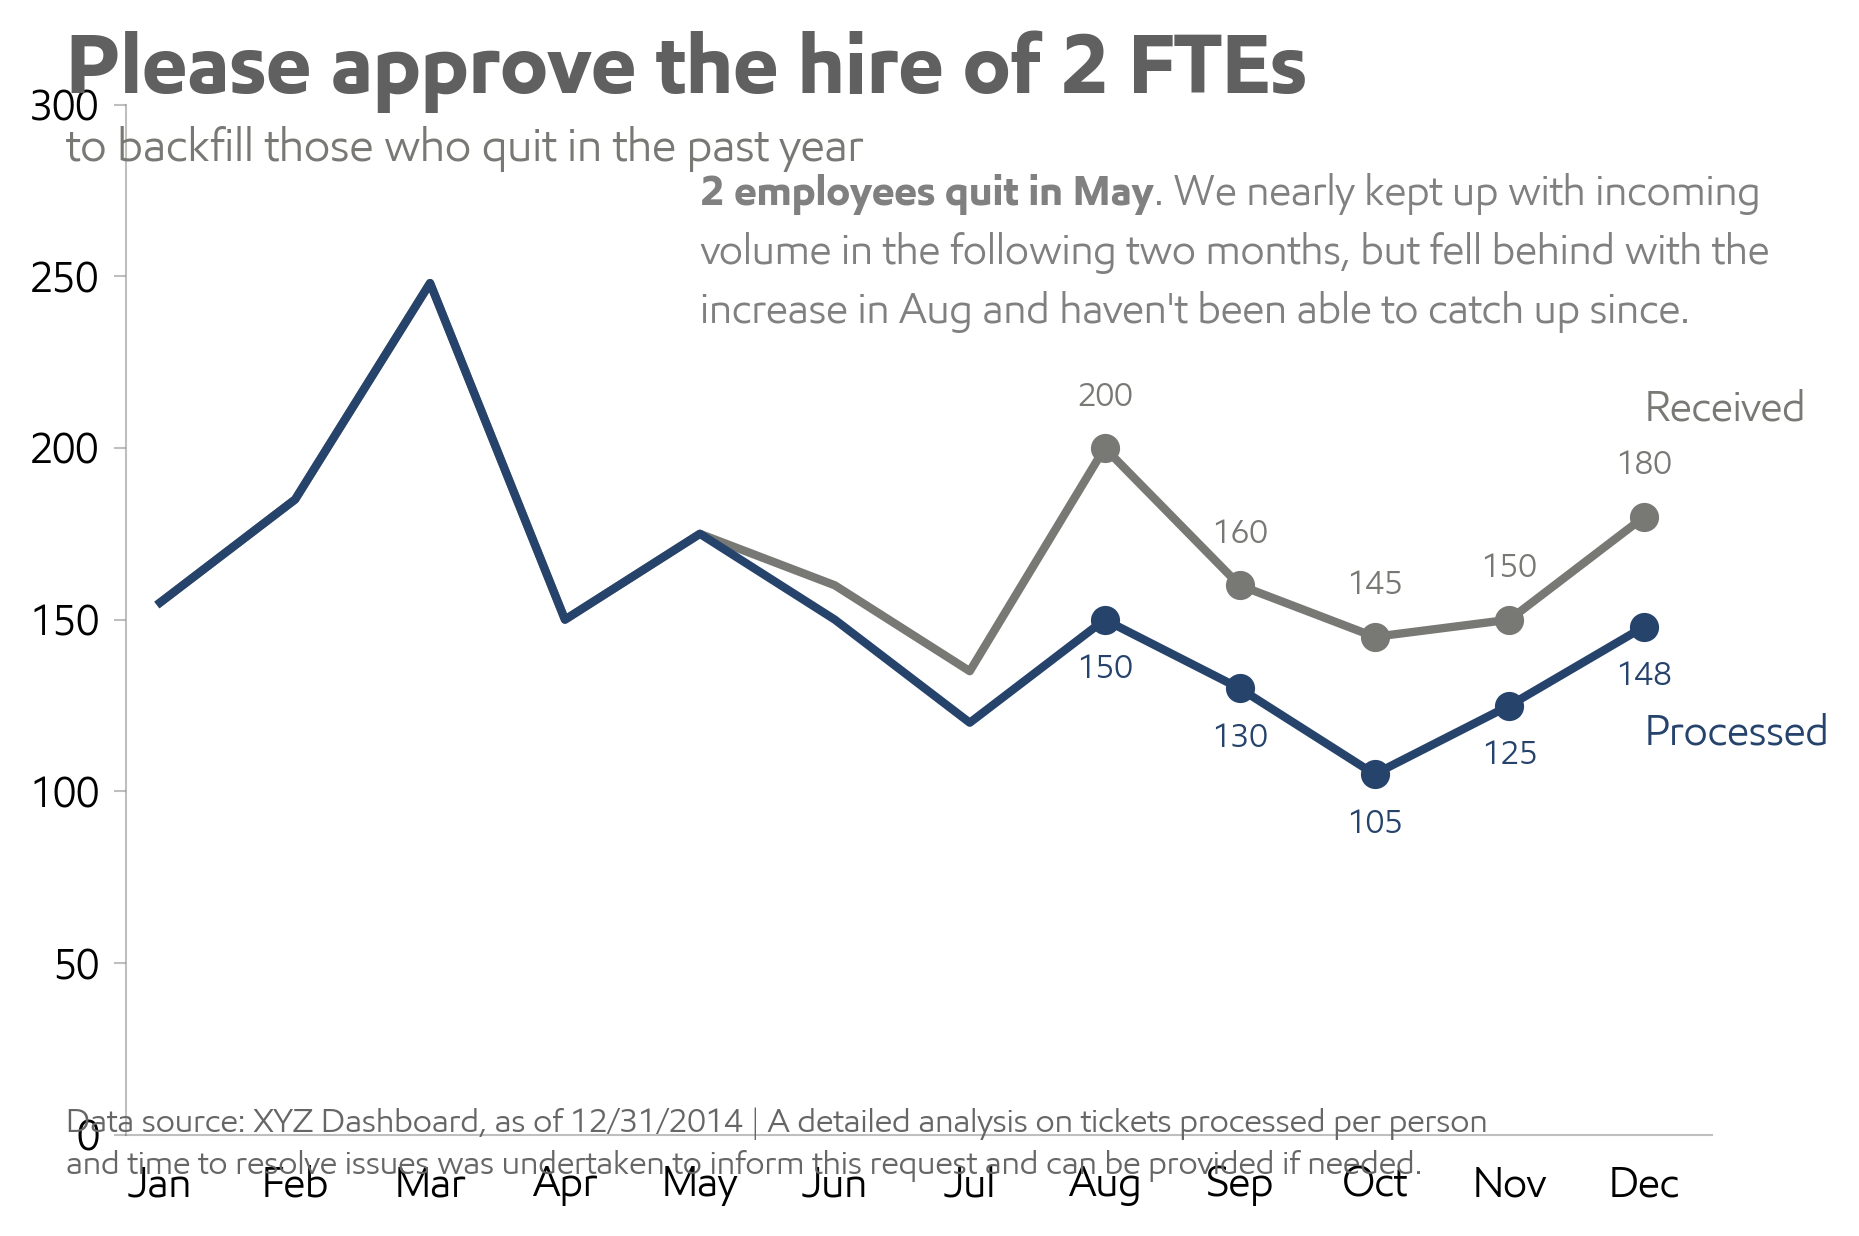

In [374]:
ticket = pd.DataFrame({'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                       'received': [155, 185, 248, 150, 175, 160, 135, 200, 160, 145, 150, 180],
                       'processed': [155, 185, 248, 150, 175, 150, 120, 150, 130, 105, 125, 148]})
def tweak_ticket(df):
    return (df
            .set_index('month'))
    
ticket = tweak_ticket(ticket)

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1, dpi=300)
ax.plot(ticket.index, ticket['received'], color='#787975', linewidth=2, label='Received')
ax.plot(ticket.index, ticket['processed'], color='#26436c', linewidth=2, label='Processed')

aug_to_dec = ticket.loc['August':]  # Slice: Aug-Dec rows
ax.plot(aug_to_dec.index, aug_to_dec['received'], color='#787975', 
        marker='o', markersize=6, linewidth=0)  # Dots only (linewidth=0 hides line)
ax.plot(aug_to_dec.index, aug_to_dec['processed'], color='#26436c', 
        marker='o', markersize=6, linewidth=0)

# Numbers: Annotate values on markers (August-Dec only)
for month, value in aug_to_dec['received'].items():
    ax.text(month, value + 10, f'{int(value)}', ha='center', va='bottom', 
            fontsize=8, color='#787975')


for month, value in aug_to_dec['processed'].items():
    ax.text(month, value - 10, f'{int(value)}', ha='center', va='top', 
            fontsize=8, color='#26436c')

for spine in ['top', 'right']: ax.spines[spine].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_alpha(0.5)  # Subtle fade
ax.spines['bottom'].set_alpha(0.5)

ax.set_yticks([0, 50, 100, 150, 200, 250, 300])
ax.set_xticks(range(12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.margins(x=0)
ax.set_xlim(left=-0.25, right=11.5)

ax.tick_params(axis='x', which='both', bottom=False)
ax.tick_params(axis='y', which='both', 
               length=3, width=0.5, 
               color=(0.5, 0.5, 0.5, 0.5),  # Gray (0.5=mid-gray) + alpha 0.5
               labelcolor='black')  # Labels stay bold/visible

ax.annotate("Received",
            xy=(ticket.index[-1], ticket['received'].iloc[-1]),
            xytext=(ticket.index[-1], ticket['received'].iloc[-1] + 25),
            fontsize=10, color='#787975',
            ha='left', va='bottom')

ax.annotate("Processed",
            xy=(ticket.index[-1], ticket['processed'].iloc[-1]),
            xytext=(ticket.index[-1], ticket['processed'].iloc[-1] - 25),
            fontsize=10, color='#26436c',
            ha='left', va='top')

# ax.vlines(4, 0, 250)

ax_text(4.0, 280,  # Adjusted y for top alignment within bounds
        "<2 employees quit in May>. We nearly kept up with incoming\nvolume in the following two months, but fell behind with the\nincrease in Aug and haven't been able to catch up since.",
        fontsize=10, ha='left', va='top', color='gray', 
        ax=ax,  
        transform=ax.transAxes, linespacing=1.2,
        highlight_textprops=[{'weight': 'bold'}])

fig.suptitle("Please approve the hire of 2 FTEs", fontsize=20, color="#5f605f", fontweight="bold", ha="left", x=0.02, y=0.98)
fig.text(0.02, 0.90, "to backfill those who quit in the past year", fontsize=11, color='#787975', ha='left', va='top')

fig.text(0.02, 0.02, "Data source: XYZ Dashboard, as of 12/31/2014 | A detailed analysis on tickets processed per person\nand time to resolve issues was undertaken to inform this request and can be provided if needed.", fontsize=8, color='#666666', ha='left', va='bottom', linespacing=1.4)

plt.subplots_adjust(left=0.08, bottom=0.15, right=0.95)
plt.tight_layout(pad=0)
plt.show()

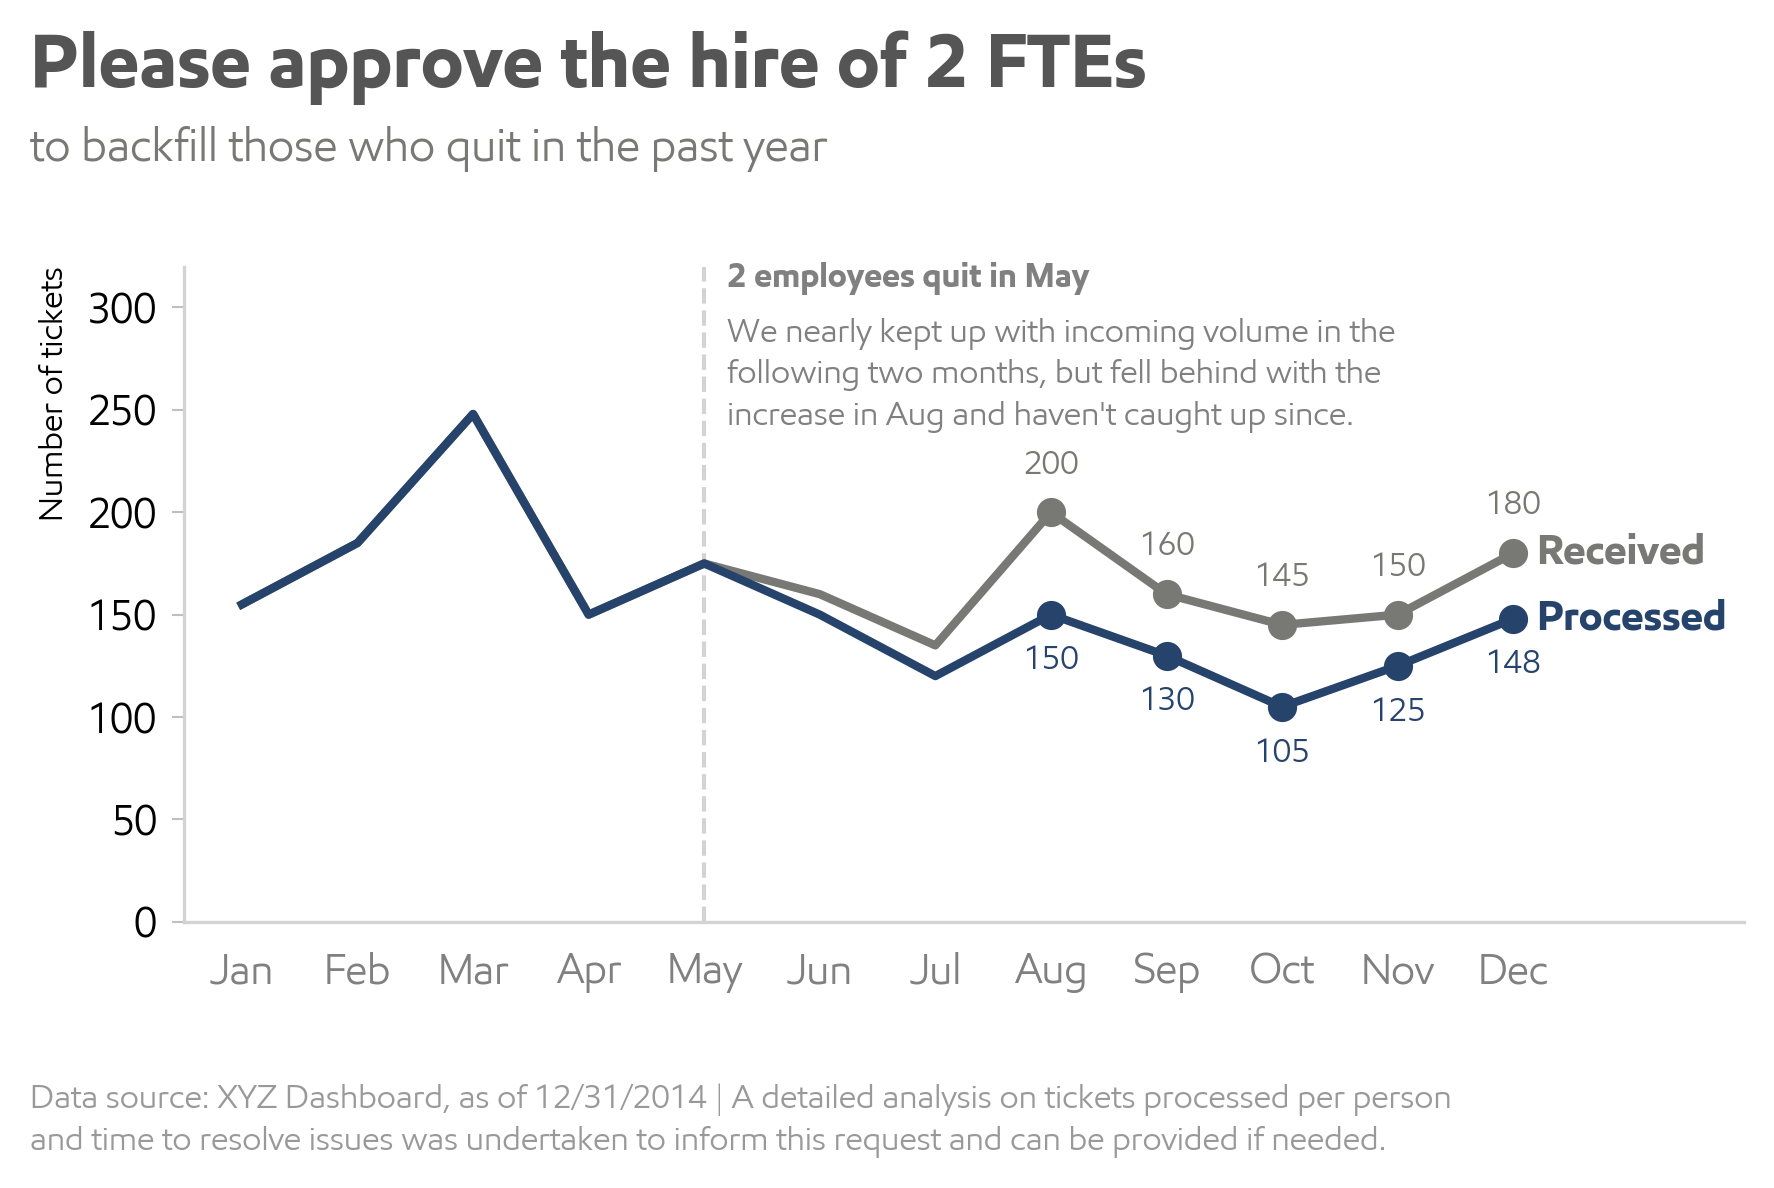

In [389]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_process_status(data, time_col, received_col, processed_col,
                        event_index=None, event_title=None, event_desc=None,
                        marker_start_index=0,
                        title=None, subtitle=None, footer=None):
    """
    Generates a line chart comparing Received vs Processed items with event annotation.
    
    Parameters:
    - data: DataFrame containing the data.
    - time_col: Name of column for X-axis (e.g., 'month').
    - received_col: Name of column for 'Received' line.
    - processed_col: Name of column for 'Processed' line.
    - event_index: Integer index (0-based) where the 'Event' (e.g., employees quit) happened.
    - event_title: Bold header text for the event.
    - event_desc: Description text for the event.
    - marker_start_index: Integer index to start showing data dots/labels (e.g., 7 for August).
    """
    
    # Data Prep
    df = data.copy()
    # Ensure we have a numeric index for plotting, but keep labels for x-axis
    x_indices = range(len(df))
    x_labels = df[time_col].tolist()
    
    # Colors
    color_rec = '#787975' # Gray
    color_proc = '#26436c' # Blue
    
    fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

    # 1. Main Lines
    ax.plot(x_indices, df[received_col], color=color_rec, linewidth=2)
    ax.plot(x_indices, df[processed_col], color=color_proc, linewidth=2)

    # 2. Markers & Value Labels (Subset)
    # Only plot markers from the specific start index onwards
    for i in range(marker_start_index, len(df)):
        # Received (Top)
        val_rec = df[received_col].iloc[i]
        ax.plot(i, val_rec, 'o', color=color_rec, ms=6)
        ax.text(i, val_rec + 15, f'{int(val_rec)}', ha='center', va='bottom', 
                fontsize=8, color=color_rec)
        
        # Processed (Bottom)
        val_proc = df[processed_col].iloc[i]
        ax.plot(i, val_proc, 'o', color=color_proc, ms=6)
        ax.text(i, val_proc - 15, f'{int(val_proc)}', ha='center', va='top', 
                fontsize=8, color=color_proc)

    # 3. End of Line Labels (Dynamic placement)
    # Place text slightly to the right of the last data point
    last_idx = x_indices[-1]
    last_rec = df[received_col].iloc[-1]
    last_proc = df[processed_col].iloc[-1]
    
    ax.text(last_idx + 0.2, last_rec, "Received", fontsize=10, color=color_rec, va='center', fontweight='bold')
    ax.text(last_idx + 0.2, last_proc, "Processed", fontsize=10, color=color_proc, va='center', fontweight='bold')

    # 4. Event Annotation (Vertical Line + Text)
    if event_index is not None:
        # Draw Vertical Line
        ax.axvline(x=event_index, color='#d3d3d3', linestyle='--', linewidth=1, zorder=0)
        
        # Text Logic: Place text slightly to the right of the line, near the top
        # We use axis transformation for Y to keep it fixed near the top regardless of data
        text_x = event_index + 0.2
        
        if event_title:
            ax.text(text_x, 310, event_title, fontsize=8, fontweight='bold', color='gray')
        
        if event_desc:
            # Offset Y slightly below the title
            ax.text(text_x, 295, event_desc, fontsize=8, color='gray', va='top', linespacing=1.4)

    # 5. Formatting
    ax.set_xticks(x_indices)
    ax.set_xticklabels([label[:3] for label in x_labels]) # First 3 letters of month
    
    # Y-Axis styling
    ax.set_ylabel('Number of tickets', fontsize=8, loc='top')
    ax.set_yticks([0, 50, 100, 150, 200, 250, 300])
    ax.tick_params(axis='x', which='both', bottom=False, labelcolor='gray')
    ax.tick_params(axis='y', which='both', 
               length=3, width=0.5, 
               color=(0.5, 0.5, 0.5, 0.5),  # Gray (0.5=mid-gray) + alpha 0.5
               labelcolor='black')  # Labels stay bold/visible
    
    # Spines
    for spine in ['top', 'right']: 
        ax.spines[spine].set_visible(False)
    ax.spines[['bottom', 'left']].set_color('#d3d3d3')
    
    # Limits (Add padding on right for text)
    ax.set_xlim(left=-0.5, right=len(df) + 1.0) 
    ax.set_ylim(0, 320) # Fixed height to accommodate top text

    # 6. Titles & Footer
    if title:
        fig.suptitle(title, fontsize=18, color="#555555", fontweight="bold", ha="left", x=0.02, y=0.96)
    if subtitle:
        fig.text(0.02, 0.88, subtitle, fontsize=11, color='#787975', ha='left', va='top')
        
    if footer:
        fig.text(0.02, 0.02, footer, fontsize=8, color='#999999', ha='left', va='bottom', linespacing=1.4)
        rect_param = [0, 0.12, 1, 0.90]
    else:
        rect_param = [0, 0, 1, 0.90]

    plt.tight_layout(rect=rect_param)
    return fig, ax

# --- USAGE EXAMPLE ---

# 1. Setup Data
ticket = pd.DataFrame({
    'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'received': [155, 185, 248, 150, 175, 160, 135, 200, 160, 145, 150, 180],
    'processed': [155, 185, 248, 150, 175, 150, 120, 150, 130, 105, 125, 148]
})

# 2. Define Content
title_text = "Please approve the hire of 2 FTEs"
sub_text = "to backfill those who quit in the past year"
footer_text = "Data source: XYZ Dashboard, as of 12/31/2014 | A detailed analysis on tickets processed per person\nand time to resolve issues was undertaken to inform this request and can be provided if needed."

event_header = "2 employees quit in May"
event_body = (
    "We nearly kept up with incoming volume in the\n"
    "following two months, but fell behind with the\n"
    "increase in Aug and haven't caught up since."
)

# 3. Plot
plot_process_status(
    data=ticket,
    time_col='month',
    received_col='received',
    processed_col='processed',
    marker_start_index=7,         # Start dots at August (Index 7)
    event_index=4,                # Vertical line at May (Index 4)
    event_title=event_header,
    event_desc=event_body,
    title=title_text,
    subtitle=sub_text,
    footer=footer_text
)

plt.show()

# Line Chart (Actual v Forecast)

In [474]:
sales = pd.DataFrame({
    "sales_in_billion": [50, 55, 60, 64, 76, 84, 90, 100, 108, 119, 131, 144, 158]
}, index=np.arange(2006, 2019, 1))
sales

,sales_in_billion
2006,50
2007,55
2008,60
2009,64
2010,76
2011,84
2012,90
2013,100
2014,108
2015,119


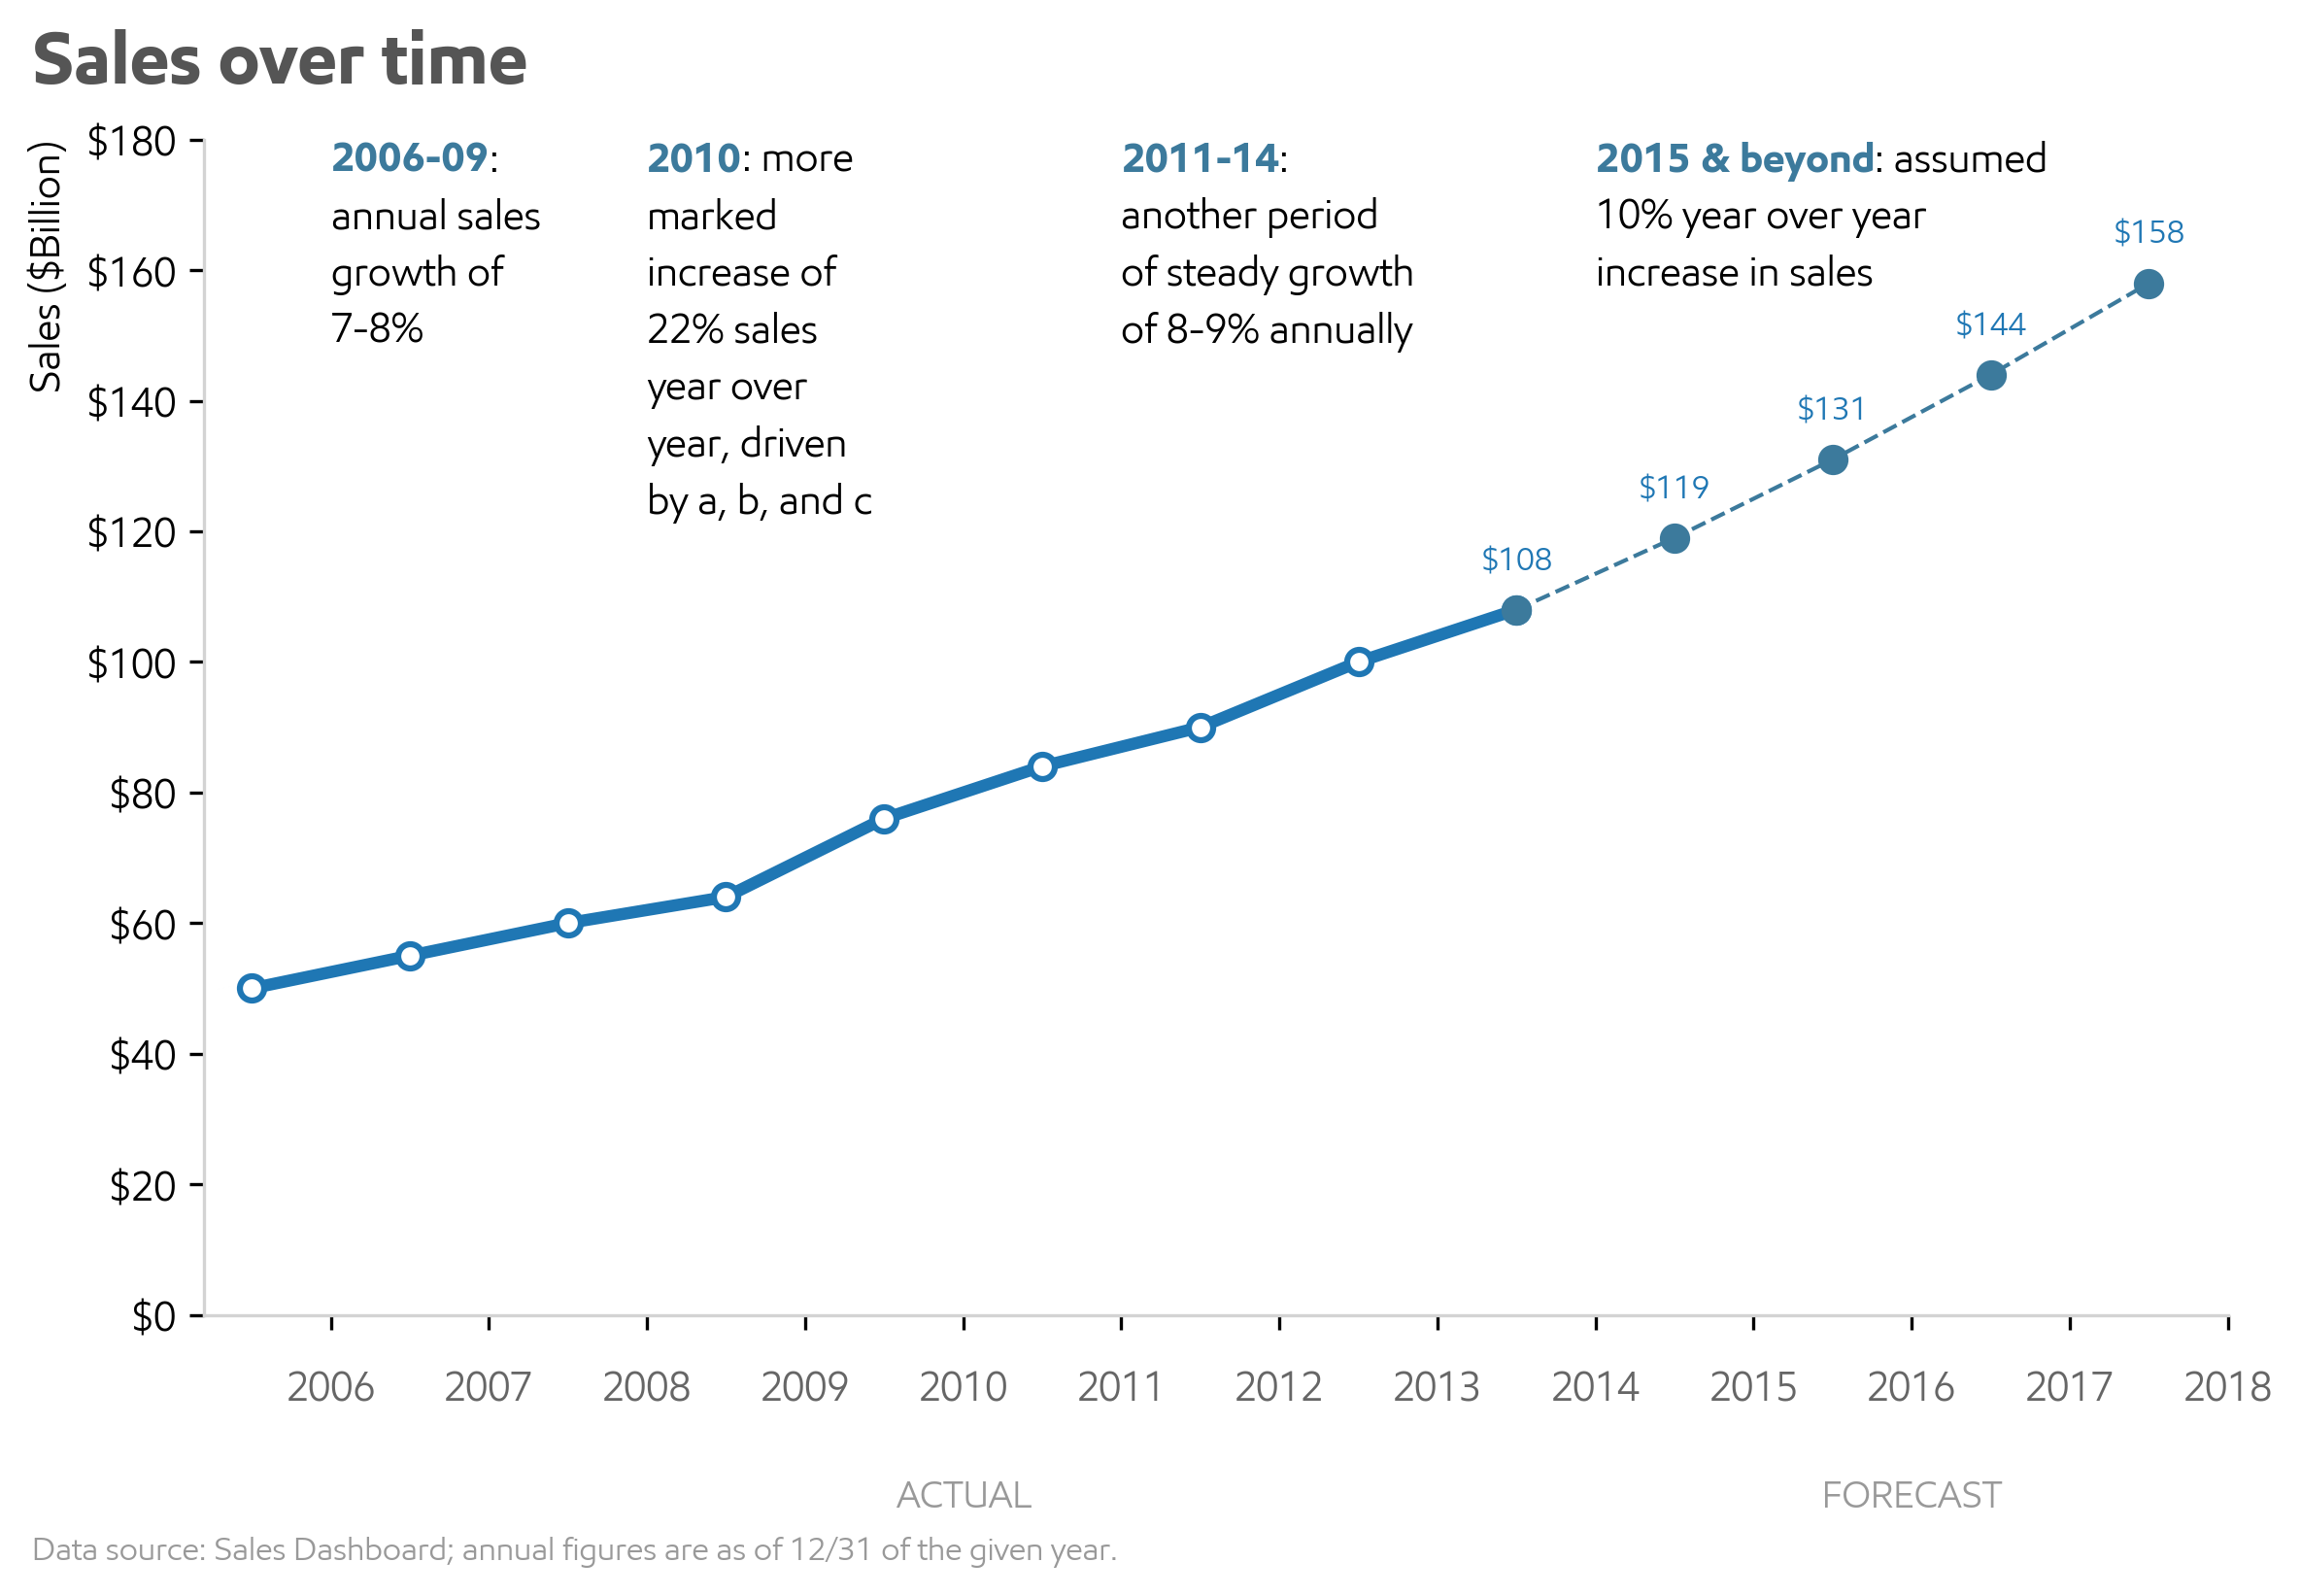

In [480]:
from highlight_text import ax_text

fig, ax = plt.subplots(figsize=(8, 5.5), dpi=300)

fig.suptitle("Sales over time", fontsize=18, color="#555555", fontweight="bold", ha="left", x=0.02, y=0.96)

mask = sales.index <= 2014
ax.plot(sales.index[mask], sales['sales_in_billion'][mask], linewidth=3, marker='o', mfc="white", markeredgewidth=1.5)

ax.plot(sales.index[sales.index >= 2014], sales['sales_in_billion'][sales.index >= 2014], color='#3c7a9c', linestyle='--', linewidth=1, marker='o', mfc="#3c7a9c", markeredgewidth=1.5)

ax.set_xlim(2005.7, 2018.3)
ax.set_xticks(np.arange(2006.5, 2019.5, 1))
ax.set_xticklabels(range(2006, 2019), fontsize=10, color='#666666')
ax.tick_params(axis='x', which='both', pad=10)  # hides ticks, pushes labels down

ax.text(2010.5, -25, "ACTUAL", ha='center', va='top', fontsize=9, color='#999999')
ax.text(2016.5, -25, "FORECAST", ha='center', va='top', fontsize=9, color='#999999')

ax.set_ylim(0, 180)
ax.set_yticks([tick for tick in range(0, 200, 20)])
ax.set_yticklabels([f"${tick}" for tick in range(0, 200, 20)])
ax.set_ylabel("Sales ($Billion)", loc='top')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.spines[['bottom', 'left']].set_color('#d3d3d3')

sales_annotation = [
    "2006-09: annual sales growth of 7-8%",
    "2010: more marked increase of 22% sales year over year, driven by a, b, and c",
    "2011-14: another period of steady growth of 8-9% annually",
    "2015 & beyond: assumed 10% year over year increase in sales"
]

footer = "Data source: Sales Dashboard; annual figures are as of 12/31 of the given year."
fig.text(0.02, 0.0, footer, fontsize=8, color='#999999', ha='left', va='bottom', linespacing=1.4)

for year, value in zip(sales.index[sales.index >= 2014], sales['sales_in_billion'][sales.index >= 2014]):
        ax.text(year, value+5,
                f'${value}',
                ha='center', va='bottom',
                fontsize=8,
                color='#1f77b4')

ax_text(x=2006.5,
        y=180,
        s="<2006-09>:\nannual sales\ngrowth of\n7-8%",
        highlight_textprops=[{'color': '#3c7a9c', 'weight': 'bold'}])

ax_text(x=2008.5,
        y=180,
        s="<2010>: more\nmarked\nincrease of\n22% sales\nyear over\nyear, driven\nby a, b, and c",
        highlight_textprops=[{'color': '#3c7a9c', 'weight': 'bold'}])

ax_text(x=2011.5,
        y=180,
        s="<2011-14>:\nanother period\nof steady growth\nof 8-9% annually",
        highlight_textprops=[{'color': '#3c7a9c', 'weight': 'bold'}])

ax_text(x=2014.5,
        y=180,
        s="<2015 & beyond>: assumed\n10% year over year\nincrease in sales",
        highlight_textprops=[{'color': '#3c7a9c', 'weight': 'bold'}])

plt.tight_layout()
plt.show()

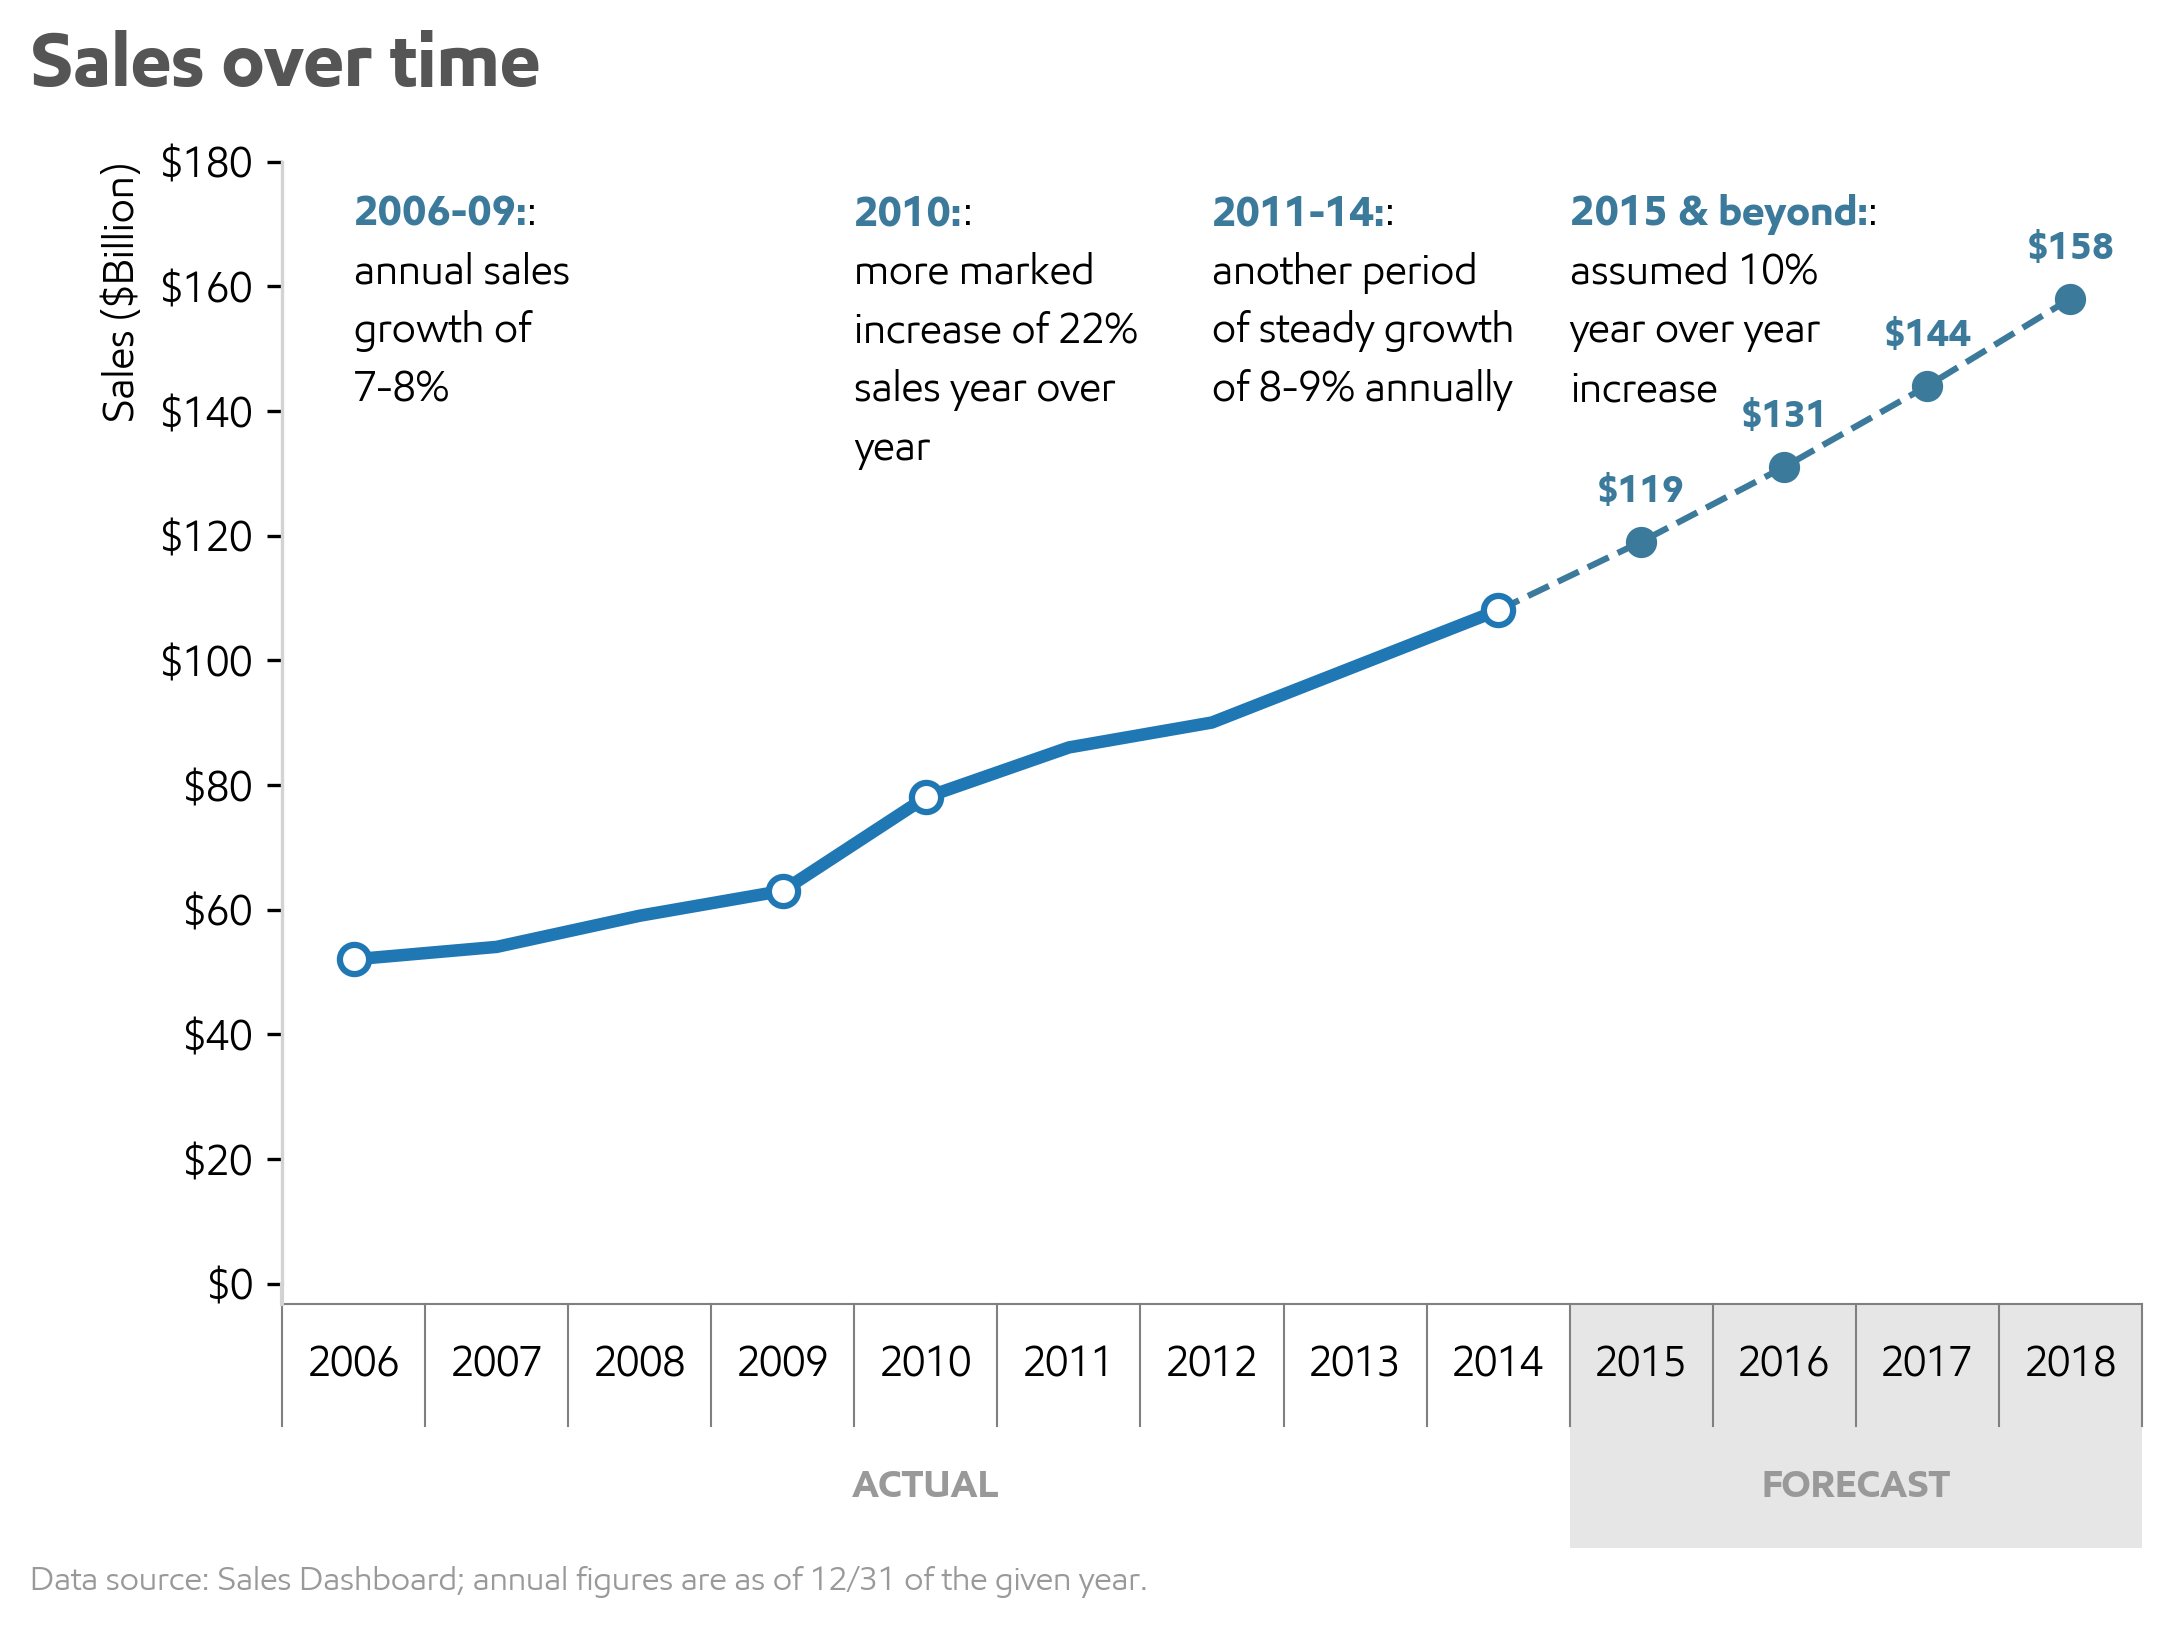

In [493]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np

def plot_forecast_chart(data, year_col, value_col, 
                        forecast_start_year,
                        show_markers_at=None,
                        annotations=None,
                        title=None, footer=None):
    
    # --- 1. Data Prep ---
    df = data.copy()
    actual = df[df[year_col] <= forecast_start_year]
    forecast = df[df[year_col] >= forecast_start_year]
    
    # Sort just in case
    df = df.sort_values(year_col)
    years = df[year_col].unique()
    
    # Layout definition
    fig, ax = plt.subplots(figsize=(8, 5.5), dpi=300) 

    # --- 2. Plotting Lines ---
    ax.plot(actual[year_col], actual[value_col], 
            linewidth=3,
            color='#1f77b4', zorder=3, marker=None)
    
    if show_markers_at:
        # Filter data to only the specific years requested
        marker_data = actual[actual[year_col].isin(show_markers_at)]
        
        ax.plot(marker_data[year_col], marker_data[value_col], 
                linestyle='None', # No line connecting these, just dots
                marker='o', mfc="white", markeredgewidth=1.5, ms=7,
                color='#1f77b4', zorder=4)
    else:
        # Fallback: Show all markers if no list provided
        ax.plot(actual[year_col], actual[value_col], 
                linestyle='None', marker='o', mfc="white", markeredgewidth=1.5, 
                color='#1f77b4', zorder=4)
    
    ax.plot(forecast[year_col], forecast[value_col], 
            color='#3c7a9c', linestyle='--', linewidth=1.5, 
            marker='o', mfc="#3c7a9c", markeredgewidth=1.5, zorder=3)

    # --- 3. Custom Axis "Table" Logic ---
    ax.set_xticks([])
    ax.spines['bottom'].set_visible(False)
    
    # Table positioning
    y_min = 0 
    # Small gap below y=0 before table starts
    table_top = y_min - (ax.get_ylim()[1] * 0.02) 
    row_height = (ax.get_ylim()[1] * 0.12)
    
    # Define exact X boundaries for the table
    x_start = years[0] - 0.5
    x_end = years[-1] + 0.5
    
    # **FIX 1: Lock X-limits so Y-axis spine aligns with table edge**
    ax.set_xlim(x_start, x_end)

    # **FIX 2: The Connector Line (The Bridge)**
    # Connects (x_start, 0) down to (x_start, table_top)
    ax.plot([x_start, x_start], [y_min, table_top], 
            color='#d3d3d3', linewidth=1.0, clip_on=False, zorder=10)

    # Gray Forecast Background
    rect_start_x = forecast_start_year + 0.5 
    rect_width = x_end - rect_start_x
    
    rect = Rectangle((rect_start_x, table_top - (row_height*2)), rect_width, row_height*2,
                     facecolor='#e6e6e6', edgecolor='none', zorder=0, clip_on=False)
    ax.add_patch(rect)

    # Draw Vertical Dividers & Labels
    for year in years:
        # Divider line
        ax.plot([year - 0.5, year - 0.5], [table_top, table_top - row_height], 
                color='gray', linewidth=0.5, clip_on=False)
        # Label
        ax.text(year, table_top - (row_height/2), str(year), 
                ha='center', va='center', fontsize=10, )

    # End Vertical Line
    ax.plot([x_end, x_end], [table_top, table_top - row_height], 
            color='gray', linewidth=0.5, clip_on=False)

    # Horizontal Lines
    ax.plot([x_start, x_end], [table_top, table_top], 
            color='gray', linewidth=0.5, clip_on=False) 
    
    # Row 2 Labels
    mid_actual = (years[0] + forecast_start_year) / 2
    ax.text(mid_actual, table_top - (row_height * 1.5), "ACTUAL", 
            ha='center', va='center', fontsize=9, color='#999999', fontweight='bold')
    
    mid_forecast = (forecast_start_year + 1 + years[-1]) / 2
    ax.text(mid_forecast, table_top - (row_height * 1.5), "FORECAST", 
            ha='center', va='center', fontsize=9, color='#999999', fontweight='bold')

    # --- 4. Styling ---
    ax.set_ylim(0, 180)
    ax.set_yticks([tick for tick in range(0, 200, 20)])
    ax.set_yticklabels([f"${tick}" for tick in range(0, 200, 20)])
    ax.set_ylabel("Sales ($Billion)", loc='top')
    
    for spine in ['top', 'right']: ax.spines[spine].set_visible(False)
    ax.spines['left'].set_color('#d3d3d3') # Match the connector color

    # Forecast Values
    for i, row in forecast.iterrows():
        if row[year_col] > forecast_start_year:
            ax.text(row[year_col], row[value_col] + 5, f"${int(row[value_col])}", 
                    ha='center', va='bottom', fontsize=9, color='#3c7a9c', fontweight='bold')

    # Annotations
    if annotations:
        for x, y, title_text, body_text in annotations:
            # ax.text(x, y, title_text, color='#3c7a9c', fontweight='bold', fontsize=9, ha='left', va='top')
            # ax.text(x, y - 8, body_text, color='#555555', fontsize=9, ha='left', va='top', linespacing=1.2)
            ax_text(x,
                    y,
                    s=f"<{title_text}>:\n{body_text}",
                    highlight_textprops=[{'color': '#3c7a9c', 'weight': 'bold'}])

    # Footer/Title
    if title:
        fig.suptitle(title, fontsize=18, color="#555555", fontweight="bold", ha="left", x=0.02, y=0.96)
    if footer:
        fig.text(0.02, 0.01, footer, fontsize=8, color='#999999', ha='left', va='bottom')

    plt.subplots_adjust(bottom=0.2)
    return fig, ax

# --- USAGE ---

sales = pd.DataFrame({
    'year': range(2006, 2019),
    'sales': [52, 54, 59, 63, 78, 86, 90, 99, 108, 119, 131, 144, 158]
})

annot_data = [
    (2006, 175, "2006-09:", "annual sales\ngrowth of\n7-8%"),
    (2009.5, 175, "2010:", "more marked\nincrease of 22%\nsales year over\nyear"),
    (2012, 175, "2011-14:", "another period\nof steady growth\nof 8-9% annually"),
    (2014.5, 175, "2015 & beyond:", "assumed 10%\nyear over year\nincrease")
]

footer_text = "Data source: Sales Dashboard; annual figures are as of 12/31 of the given year."

desired_markers = [2006, 2009, 2010, 2014]

plot_forecast_chart(
    data=sales,
    year_col='year',
    value_col='sales',
    forecast_start_year=2014,
    show_markers_at=desired_markers,
    annotations=annot_data,
    title="Sales over time",
    footer=footer_text
)

plt.show()

# Horizontal Stacked Bars

In [550]:
top_15_development_priorities = pd.DataFrame({
    'priority': ['Education', 'Agriculture & rural development', 'Poverty reduction', 'Reconstruction', 'Economic growth', 'Health', 'Job creation', 'Governanace', 'Anti-corruption', 'Transport', 'Energy', 'Law & Justice', 'Basic infrastructure', 'Public sector reform', 'Public financial management'],
    'most_important': [24, 17, 15, 9, 7, 3, 4, 5, 4, 4, 3, 2, 2, 2, 1],
    'second_most_important': [14, 12, 10, 5, 5, 7, 6, 5, 4, 4, 4, 3, 3, 3, 3],
    'third_most_important': [7, 8, 7, 4, 5, 6, 5, 4, 6, 4, 4, 4, 3, 3, 3],
})

top_15_development_priorities = top_15_development_priorities.assign(Total=top_15_development_priorities[
    ['most_important', 'second_most_important', 'third_most_important']
].sum(axis=1))
top_15_development_priorities_sorted = top_15_development_priorities.sort_values(by='Total', ascending=False).reset_index(drop=True)
max_total = top_15_development_priorities_sorted.sort_values(by='Total', ascending=False).reset_index(drop=True)['Total'].max()
top_15_development_priorities_sorted

,priority,most_important,second_most_important,third_most_important,Total
0,Education,24,14,7,45
1,Agriculture & rural development,17,12,8,37
2,Poverty reduction,15,10,7,32
3,Reconstruction,9,5,4,18
4,Economic growth,7,5,5,17
5,Health,3,7,6,16
6,Job creation,4,6,5,15
7,Governanace,5,5,4,14
8,Anti-corruption,4,4,6,14
9,Transport,4,4,4,12


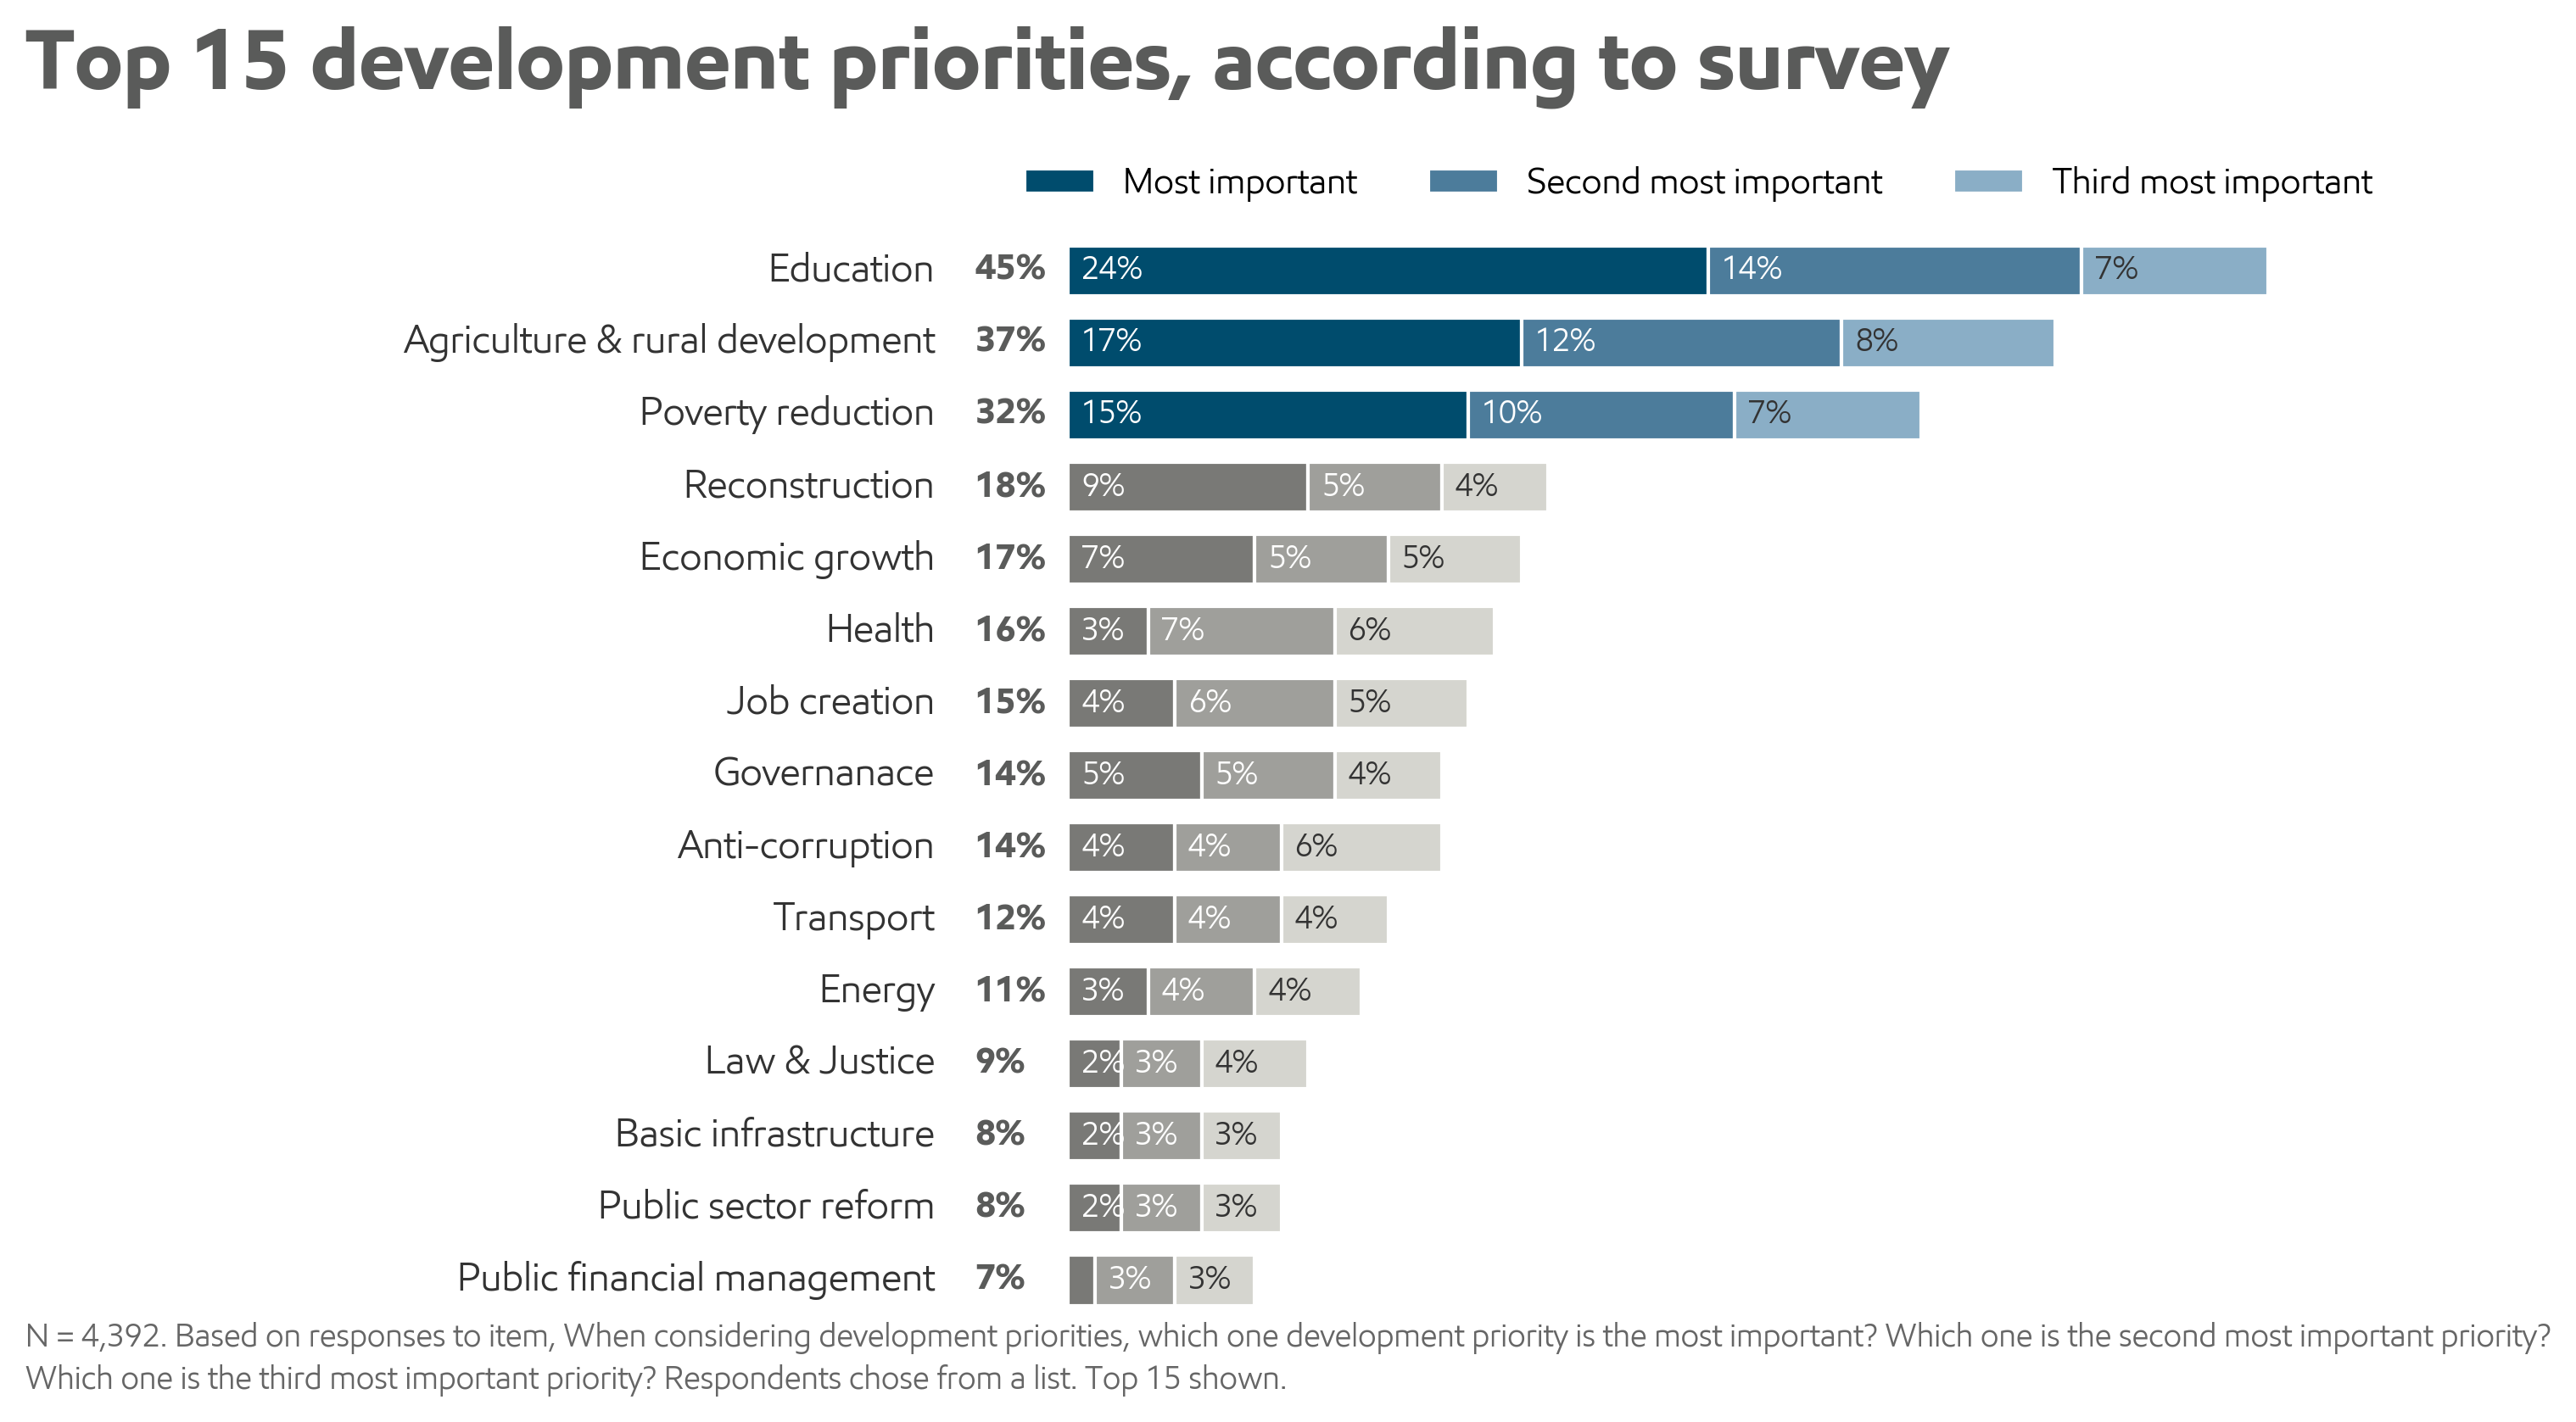

In [560]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5.5), dpi=300,)

ax.invert_yaxis()
for spine in ax.spines.values(): spine.set_visible(False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

value_cols = ['most_important', 'second_most_important', 'third_most_important']
my_colors_highlight = ['#004c6d', '#4c7c9b', '#8aaec6']
my_colors_dehighlight = ['#797976', '#9f9f9b', '#d5d5cf']
left_offsets = np.zeros(len(top_15_development_priorities_sorted))

fig.suptitle('Top 15 development priorities, according to survey', ha='left', x=-0.15, color='#5a5b5a', fontweight='bold', fontsize=24)

for k, col in enumerate(value_cols):
        bar_colors = []
        highlight_color = my_colors_highlight[k]
        dehighlight_color = my_colors_dehighlight[k]
        
        for i in range(len(top_15_development_priorities_sorted)):
                if i < 3:
                        bar_colors.append(highlight_color)
                else:
                        bar_colors.append(dehighlight_color)
        widths = top_15_development_priorities_sorted[col].values
        
        ax.barh(top_15_development_priorities_sorted['priority'], 
                widths, 
                left=left_offsets, 
                color=bar_colors, height=0.7, label=col, edgecolor='white')
        
        for i, (width, offset) in enumerate(zip(widths, left_offsets)):
                text_color = 'white' if k < 2 else '#333333'
            # Only label if the segment is wide enough to fit text
                if width > 1:
                    ax.text(offset + 0.5, i, f'{int(width)}%', 
                        ha='left', va='center', 
                        color=text_color, fontsize=9)
                
        left_offsets += widths
        
label_x_position = -5
for i, total in enumerate(left_offsets):
            priority_label = top_15_development_priorities['priority'].iloc[i]
            ax.text(label_x_position, i, priority_label, 
                    ha='right', va='center', color='#333333', fontsize=11)
            ax.text(label_x_position + 1.5, i, f'{int(total)}%', 
                    ha='left', va='center', color='#5a5b5a', fontsize=10, fontweight='bold')
            
handles, labels = ax.get_legend_handles_labels()
    # Clean up labels (Replace underscores with spaces, capitalize)
clean_labels = [l.replace('_', ' ').capitalize() for l in labels]
ax.legend(handles, clean_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), 
              ncol=len(value_cols), frameon=False, fontsize=10)

footer="N = 4,392. Based on responses to item, When considering development priorities, which one development priority is the most important? Which one is the second most important priority?\nWhich one is the third most important priority? Respondents chose from a list. Top 15 shown."
fig.text(-0.15, 0.0, footer, fontsize=9, color='#666666', ha='left', va='bottom', linespacing=1.4)
plt.tight_layout()
plt.show()

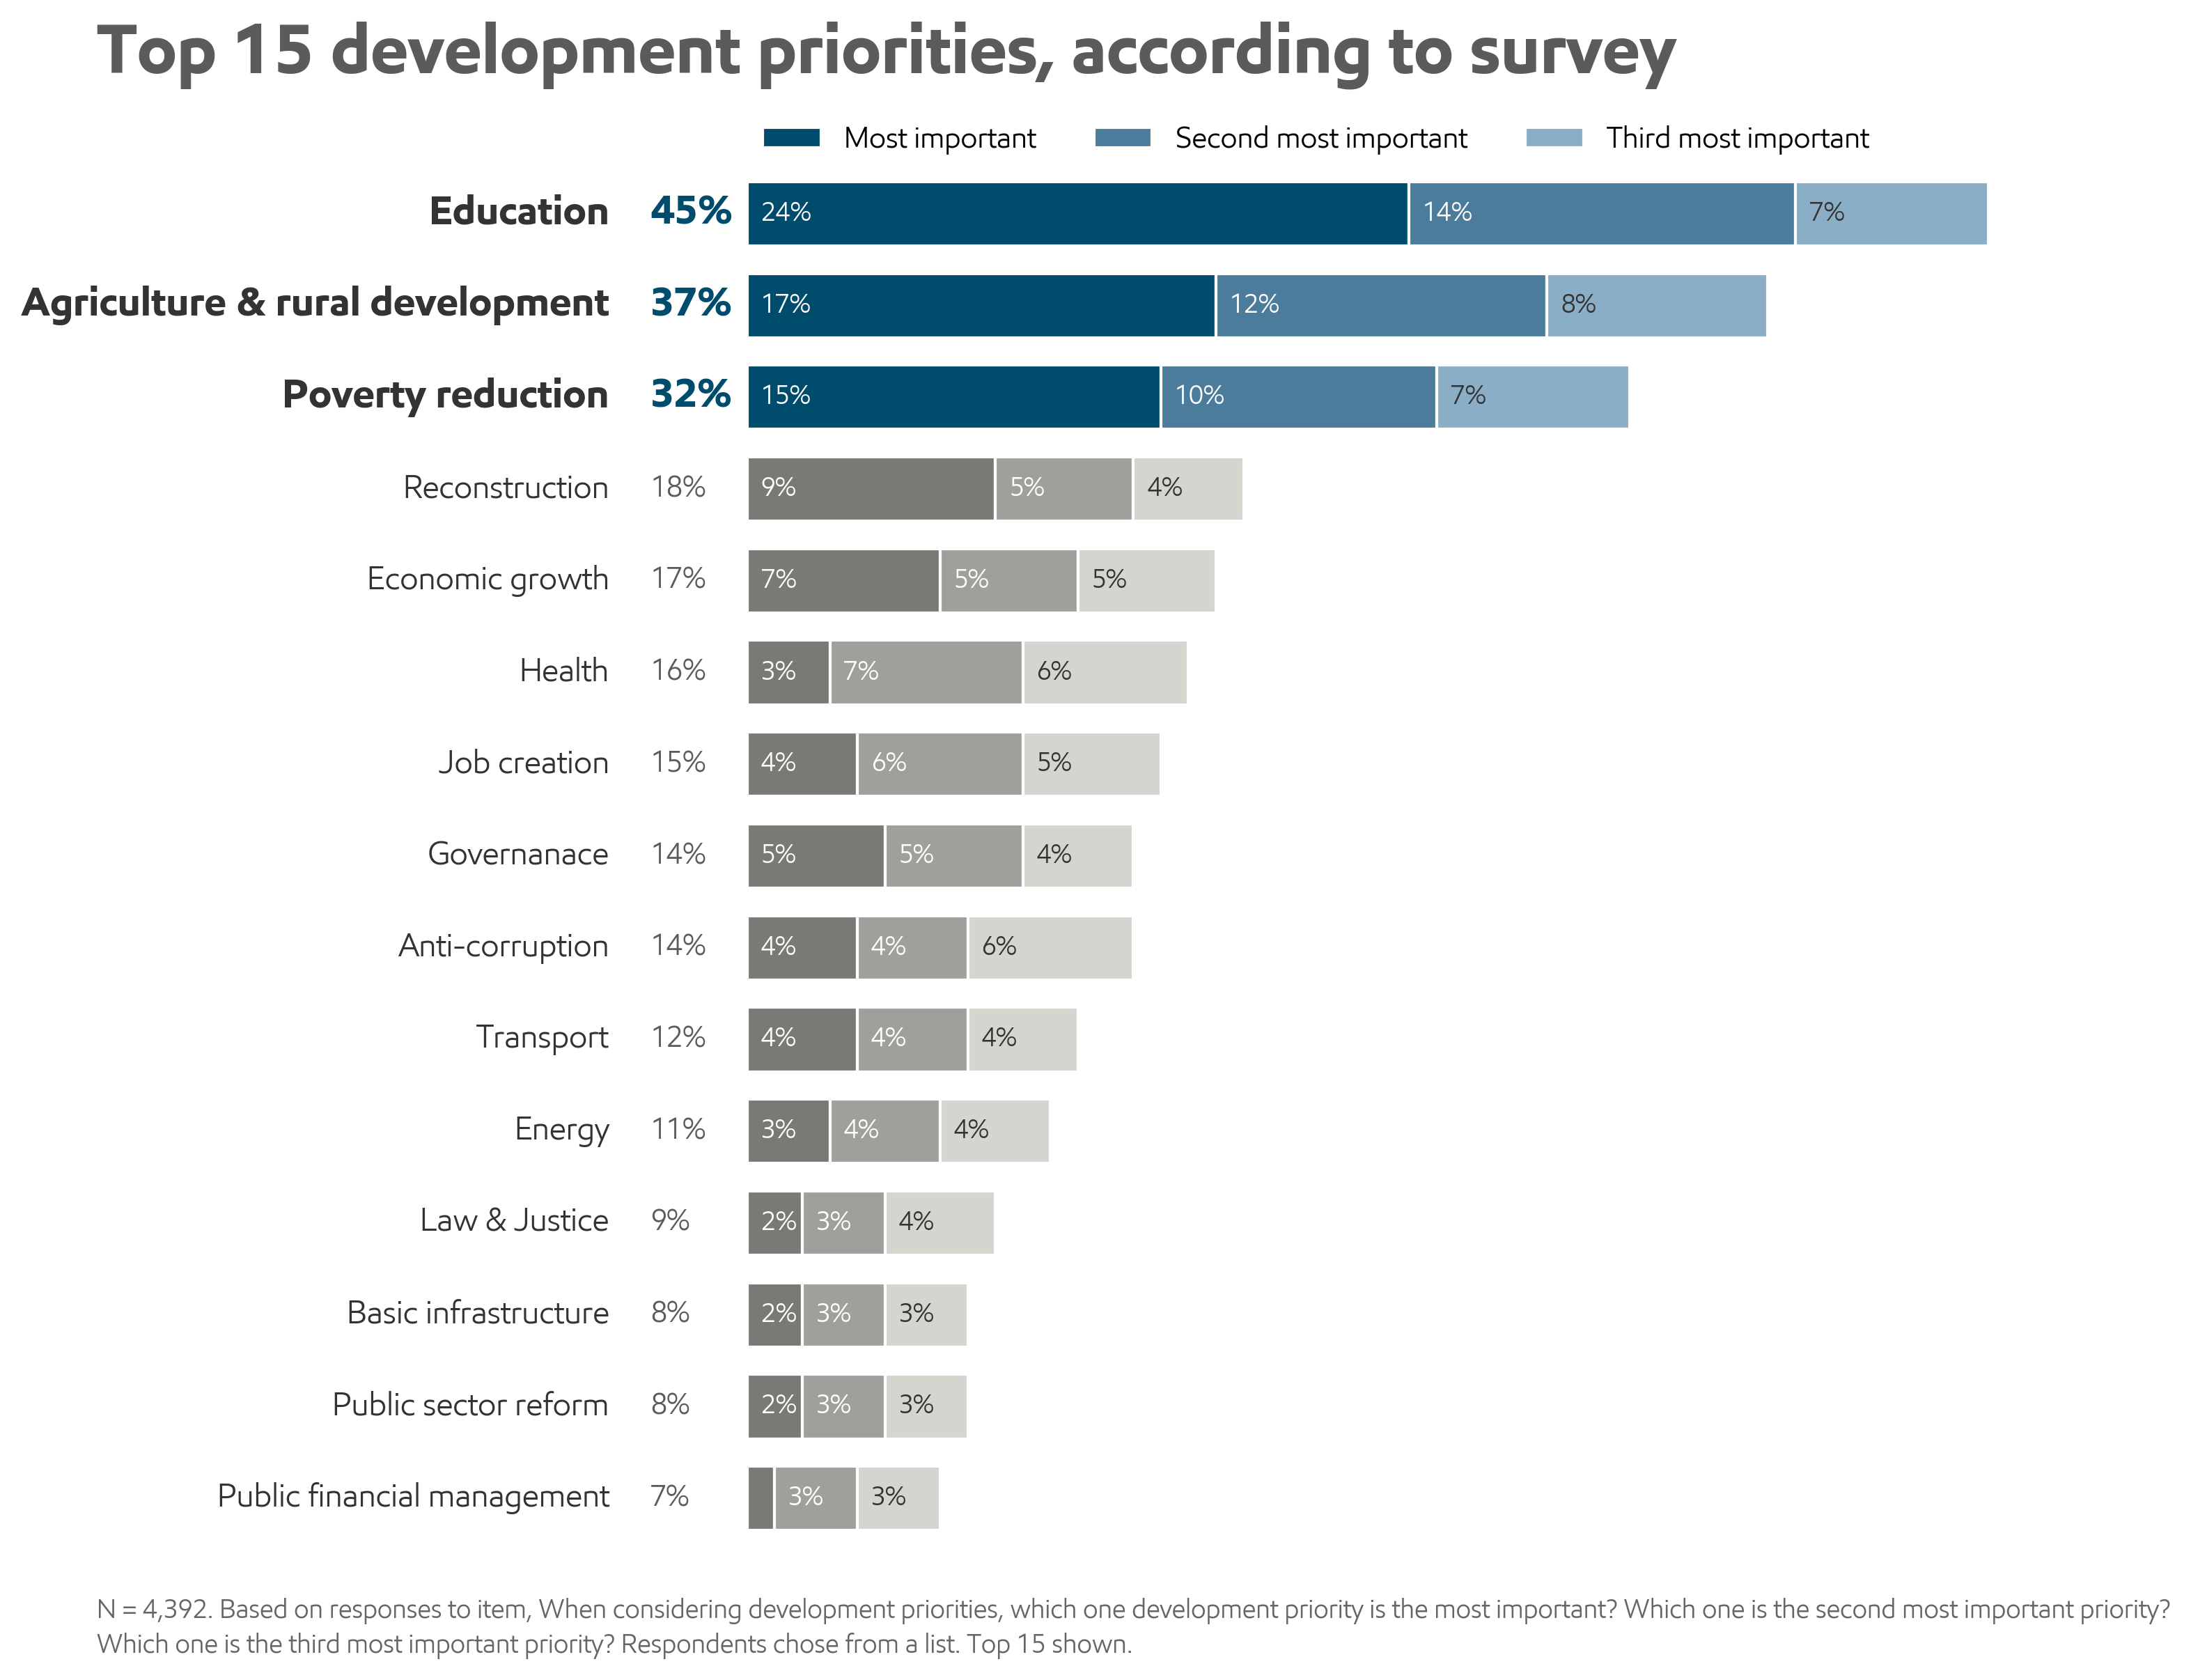

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_priorities_chart(
    data, 
    category_col, 
    value_cols, 
    my_colors_highlight, 
    my_colors_dehighlight, 
    title=None, 
    footer=None,
    highlight_n=3,
    total_label_x=-5 # X-coordinate for the manual priority/total labels
):
    """
    Generates a horizontally stacked bar chart with sorted data and conditional highlighting.
    
    Parameters:
    - data: pandas DataFrame containing priority and value columns.
    - category_col: Name of the column used for the Y-axis labels (e.g., 'priority').
    - value_cols: List of column names (in plotting order) to stack.
    - my_colors_highlight: List of colors for highlighted categories (must match len(value_cols)).
    - my_colors_dehighlight: List of colors for dehighlighted categories (must match len(value_cols)).
    - title (str): Main title for the plot.
    - footer (str): Footer text.
    - highlight_n (int): The number of top categories to highlight (e.g., 3).
    - total_label_x (int): The X-position for the manual priority labels (determines chart margin).
    """
    
    # --- 1. DATA PREPARATION ---
    df = data.copy()
    
    # Calculate Total (Summing all specified value columns)
    df['Total'] = df[value_cols].sum(axis=1)
    
    # Sort the DataFrame
    df_sorted = df.sort_values(by='Total', ascending=False).reset_index(drop=True)

    # --- 2. PLOT SETUP ---
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300) # Increased size for better label fitting
    
    # Apply baseline styling
    for spine in ax.spines.values(): spine.set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    left_offsets = np.zeros(len(df_sorted))
    
    # Set X-limit to accommodate manual labels
    max_total = df_sorted['Total'].max()
    ax.set_xlim(total_label_x - 1, max_total * 1.05) 
    ax.set_ylim(-0.5, len(df_sorted) - 0.5)

    if title:
        fig.suptitle(title, ha='left', x=0.05, color='#5a5b5a', fontweight='bold', fontsize=24)

    # --- 3. CONDITIONAL PLOTTING LOOP ---
    for k, col in enumerate(value_cols):
        
        bar_colors = []
        highlight_color = my_colors_highlight[k]
        dehighlight_color = my_colors_dehighlight[k]
        
        # Determine the color for each bar based on its rank (index i)
        for i in range(len(df_sorted)):
            if i < highlight_n:
                bar_colors.append(highlight_color)
            else:
                bar_colors.append(dehighlight_color)
        
        widths = df_sorted[col].values
        
        # Plot the bar segment
        ax.invert_yaxis()
        ax.barh(df_sorted[category_col], 
                widths, 
                left=left_offsets, 
                color=bar_colors, 
                height=0.7, 
                label=col, 
                edgecolor='white')
        
        # Add value labels (Annotations inside the bar)
        for i, (width, offset) in enumerate(zip(widths, left_offsets)):
            # Set text color: White for dark bars, black for light gray/light blue
            text_color = 'white' if k < 2 else '#333333'
            
            # Check for width > 1 for label visibility
            if width > 1:
                ax.text(offset + 0.5, i, f'{int(width)}%', 
                        ha='left', va='center', 
                        color=text_color, fontsize=9)
                
        left_offsets += widths
        
    # --- 4. MANUAL LABEL PLACEMENT ---
    
    for i, total in enumerate(left_offsets):
        priority_label = df_sorted[category_col].iloc[i]
        
        # Determine text color for total label
        total_text_color = my_colors_highlight[0] if i < highlight_n else '#5a5b5a'
        
        # PRIORITY LABEL (Manual Y-Tick Label)
        ax.text(total_label_x, i, priority_label, 
                ha='right', va='center', 
                color='#333333', fontsize=14 if i < 3 else 11, fontweight='bold' if i < 3 else 'normal')
        
        # TOTAL LABEL
        ax.text(total_label_x + 1.5, i, f'{int(total)}%', 
                ha='left', va='center', 
                color=total_text_color, fontsize=14 if i < 3 else 10, fontweight='bold' if i < 3 else 'normal')
            
    # --- 5. FINISHING TOUCHES ---
    handles, labels = ax.get_legend_handles_labels()
    clean_labels = [l.replace('_', ' ').capitalize() for l in labels]
    ax.legend(handles, clean_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), 
              ncol=len(value_cols), frameon=False, fontsize=10)

    if footer:
        fig.text(0.05, 0.0, footer, fontsize=9, color='#666666', ha='left', va='bottom', linespacing=1.4)
        
    plt.tight_layout(rect=[0, 0.05, 1, 1.0]) # Adjust bottom margin for footer
    plt.show()

# --- EXAMPLE USAGE ---

# Data defined outside the function
data = pd.DataFrame({
    'priority': ['Education', 'Agriculture & rural development', 'Poverty reduction', 'Reconstruction', 'Economic growth', 'Health', 'Job creation', 'Governanace', 'Anti-corruption', 'Transport', 'Energy', 'Law & Justice', 'Basic infrastructure', 'Public sector reform', 'Public financial management'],
    'most_important': [24, 17, 15, 9, 7, 3, 4, 5, 4, 4, 3, 2, 2, 2, 1],
    'second_most_important': [14, 12, 10, 5, 5, 7, 6, 5, 4, 4, 4, 3, 3, 3, 3],
    'third_most_important': [7, 8, 7, 4, 5, 6, 5, 4, 6, 4, 4, 4, 3, 3, 3],
})

# Color and column lists defined outside the function
value_cols = ['most_important', 'second_most_important', 'third_most_important']
my_colors_highlight = ['#004c6d', '#4c7c9b', '#8aaec6']
my_colors_dehighlight = ['#797976', '#9f9f9b', '#d5d5cf']
footer_text = "N = 4,392. Based on responses to item, When considering development priorities, which one development priority is the most important? Which one is the second most important priority?\nWhich one is the third most important priority? Respondents chose from a list. Top 15 shown."


plot_priorities_chart(
    data=data,
    category_col='priority',
    value_cols=value_cols,
    my_colors_highlight=my_colors_highlight,
    my_colors_dehighlight=my_colors_dehighlight,
    highlight_n=3,
    total_label_x=-5,
    title='Top 15 development priorities, according to survey',
    footer=footer_text
)

# Sparklines

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

non_profits = pd.DataFrame({
    'year': [2010, 2011, 2012, 2013, 2014, 2015],
    'Health': [67, 50, 60, 67, 70, 75],
    'Education': [73, 80, 70, 67, 62, 60],
    'Human services': [60, 75, 70, 60, 57, 55],
    'Arts & culture': [20, 25, 30, 40, 35, 43],
    'Other': [53, 30, 48, 30, 48, 30]
})
non_profits

,year,Health,Education,Human services,Arts & culture,Other
0,2010,67,73,60,20,53
1,2011,50,80,75,25,30
2,2012,60,70,70,30,48
3,2013,67,67,60,40,30
4,2014,70,62,57,35,48
5,2015,75,60,55,43,30


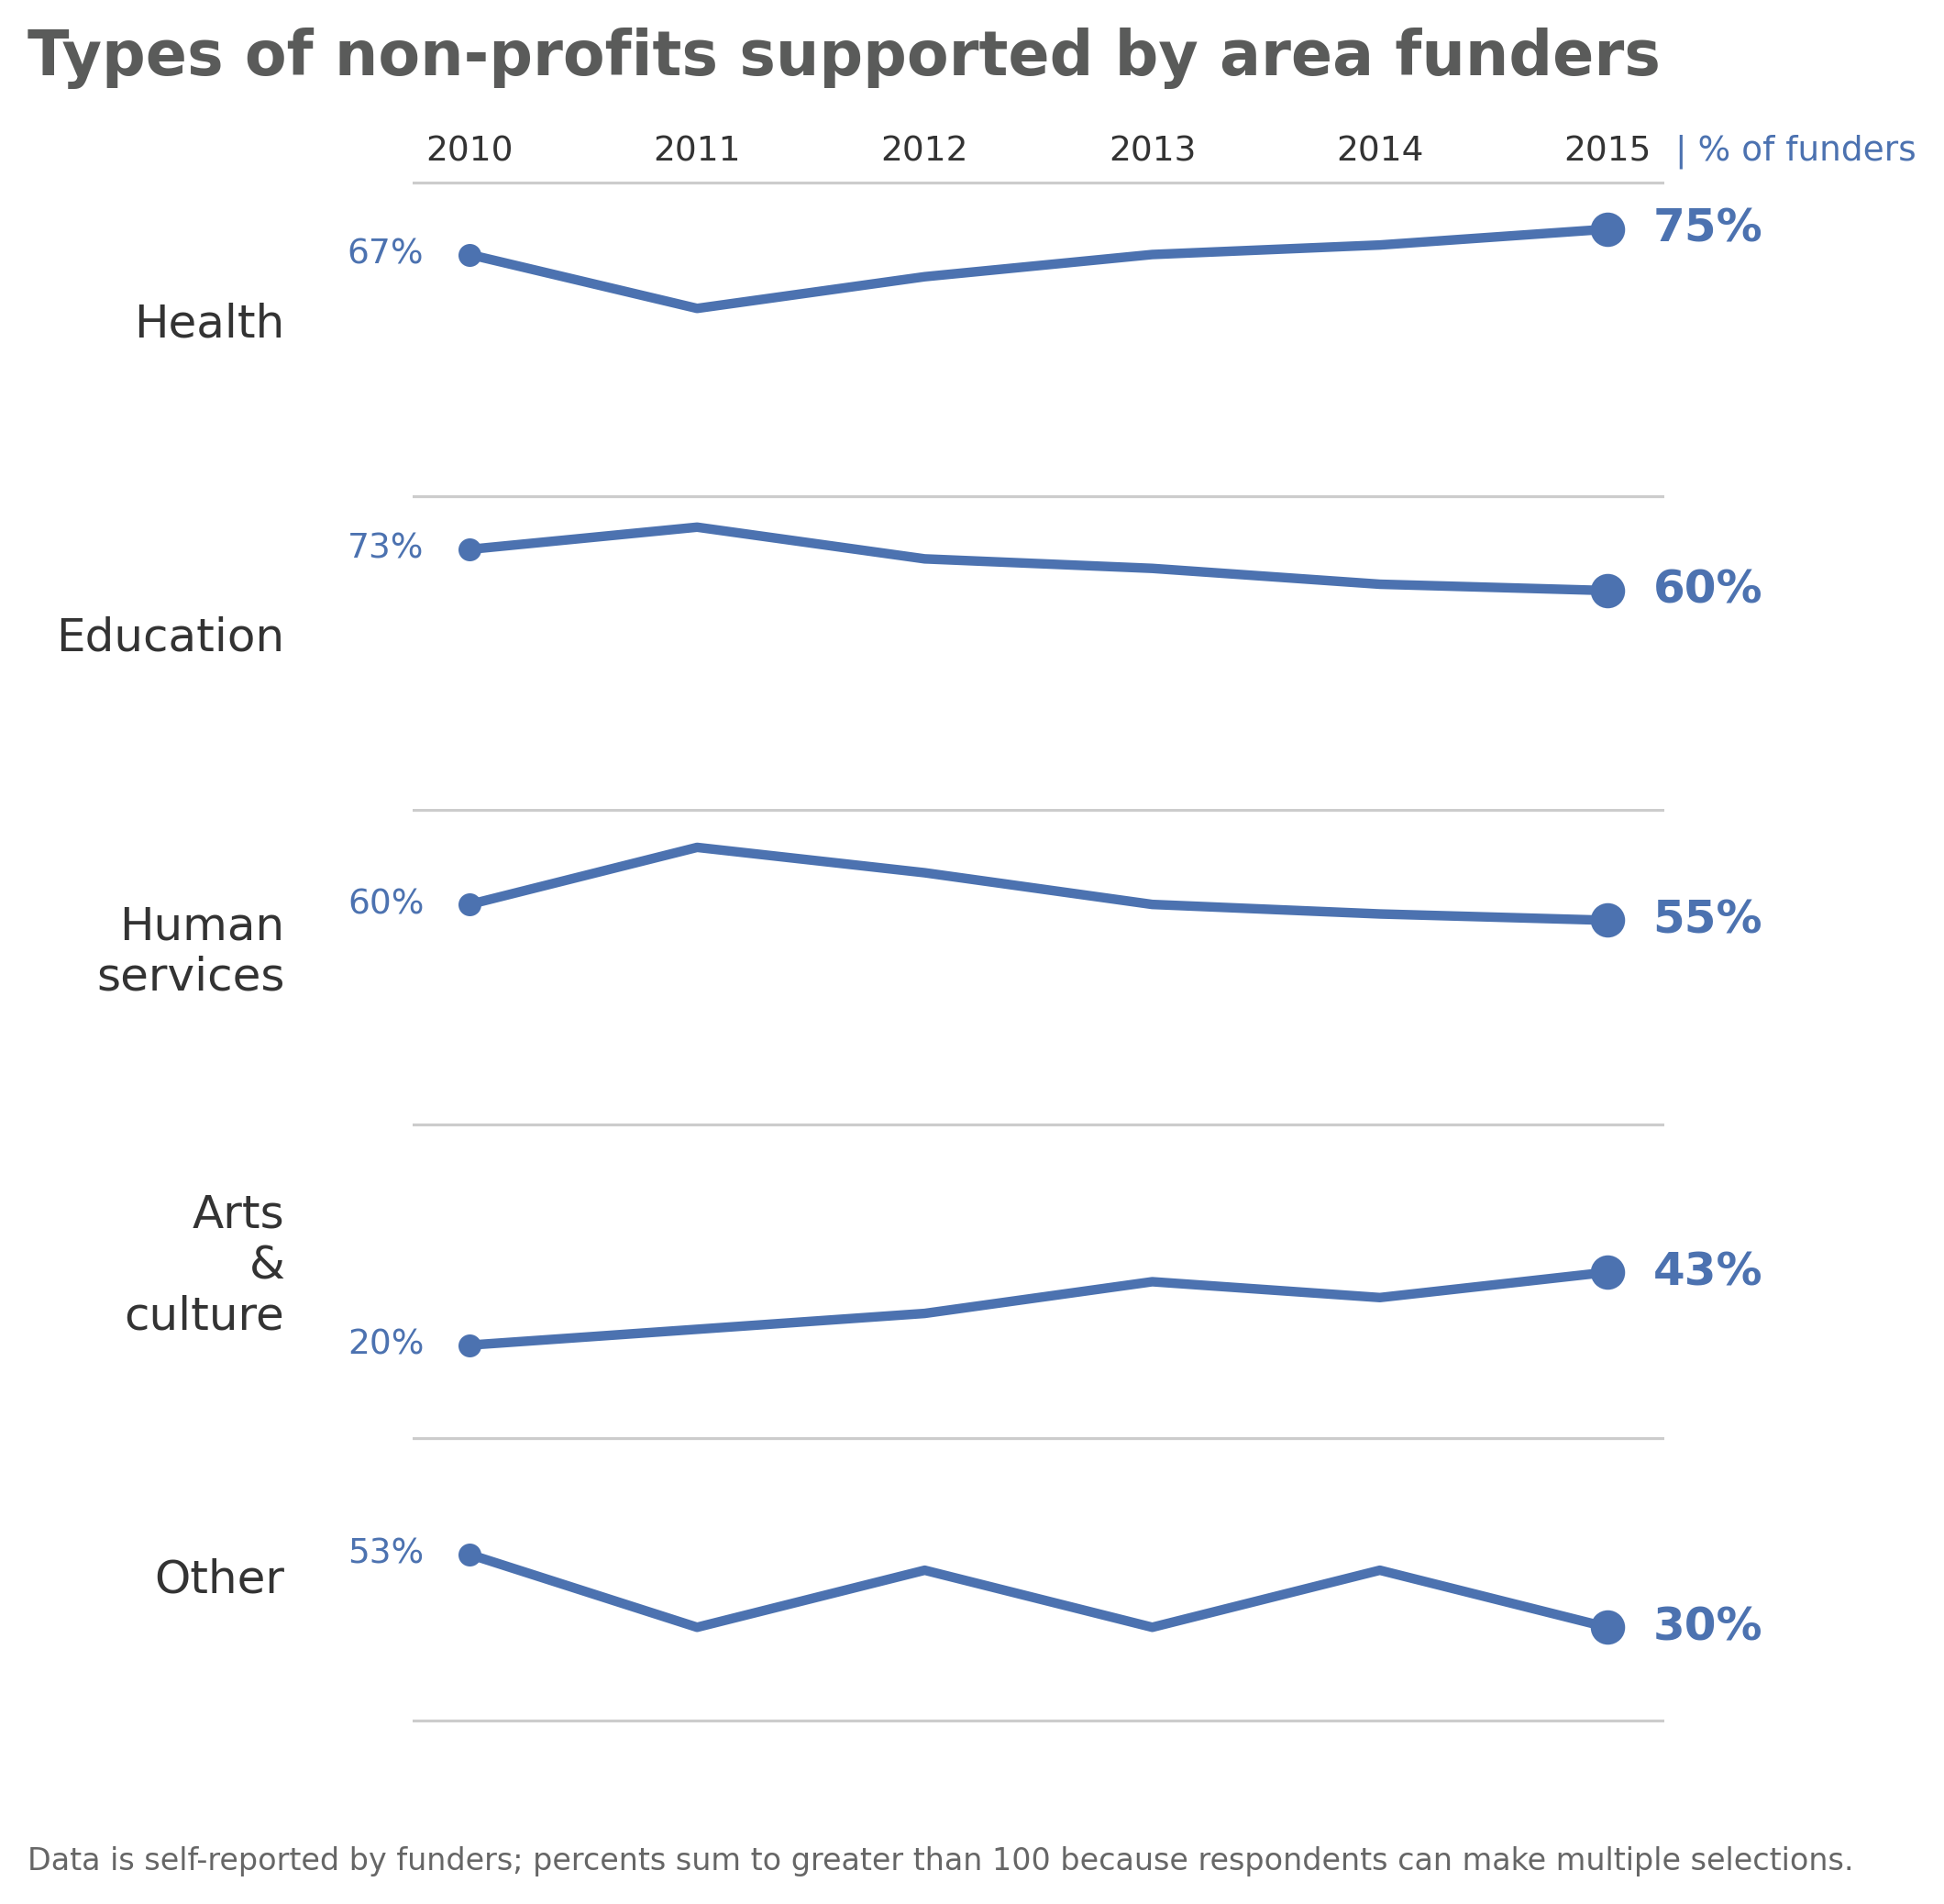

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. DATA SETUP
non_profits = pd.DataFrame({
    'year': [2010, 2011, 2012, 2013, 2014, 2015],
    'Health': [67, 50, 60, 67, 70, 75],
    'Education': [73, 80, 70, 67, 62, 60],
    'Human services': [60, 78, 70, 60, 57, 55],
    'Arts & culture': [20, 25, 30, 40, 35, 43],
    'Other': [53, 30, 48, 30, 48, 30]
})

# 2. FIGURE SETUP
layout = [['Health'], ['Education'], ['Human services'], ['Arts & culture'], ['Other']]
fig, ax = plt.subplot_mosaic(layout,
                             figsize=(7, 7), # Adjusted to be taller
                             gridspec_kw={'height_ratios': [1, 1, 1, 1, 1], 'hspace': 0.1}, 
                             sharex=True,
                             dpi=300)

fig.suptitle("Types of non-profits supported by area funders", ha='left', x=0.0, color='#5a5b5a', fontweight='bold', fontsize=16)

# Colors
line_color = '#4c72b0'
text_color = '#555555'

# Calculate ranges for logic
start_year = non_profits['year'].min()
end_year = non_profits['year'].max()
top_key = layout[0][0] # 'Health'

# GLOBAL Y-LIMITS: Crucial for visual comparison
# We find the max value across the whole dataset (80) and add padding
global_ymax = 90 
global_ymin = 0

for key, axes in ax.items():
    
    # --- A. PLOTTING ---
    # 1. The Line
    axes.plot(non_profits['year'], non_profits[key], color=line_color, linewidth=2.5, zorder=3)
    
    # 2. The Markers (Start and End only)
    # We plot a scatter point only at the first and last year
    start_val = non_profits[key].iloc[0]
    end_val = non_profits[key].iloc[-1]
    
    axes.plot(start_year, start_val, 
              'o', color=line_color, markersize=5, zorder=4)
    
    axes.plot(end_year, end_val, 
              'o', color=line_color, markersize=8, zorder=4)

    # --- B. ANNOTATIONS ---
    # Start Year Annotation
    axes.text(start_year - 0.2, start_val, f'{start_val}%', 
              ha='right', va='center', fontsize=9, color=line_color, fontweight='normal')
    
    # End Year Annotation (Bigger and Bolder)
    axes.text(end_year + 0.2, end_val, f'{end_val}%', 
              ha='left', va='center', fontsize=12, color=line_color, fontweight='bold')

    # --- C. STYLING & SEPARATORS ---
    # Set the global limits so all charts are proportional
    axes.set_ylim(global_ymin, global_ymax)
    
    # Remove all spines (boxes)
    for spine in axes.spines.values(): spine.set_visible(False)
    
    # Draw the Horizontal Separator Line at the very top of the limit
    axes.axhline(global_ymax, color='#cccccc', linewidth=1.5, zorder=1)
    
    # If it's the last plot ('Other'), draw a bottom line too to close the design
    if key == 'Other':
        axes.axhline(0, color='#cccccc', linewidth=1.5, zorder=1)

    # --- D. CATEGORY LABELS (Centered) ---
    # We use set_ylabel with rotation=0 to place text horizontally to the left
    key = key.replace(" ", "\n")
    axes.set_ylabel(key, rotation=0, ha='right', va='center', 
                    labelpad=30, fontsize=12, color='#333333')

    # --- E. AXIS TICKS ---
    axes.tick_params(axis='y', length=0)
    axes.set_yticklabels([])
    
    axes.xaxis.tick_top()
    axes.tick_params(axis='x', bottom=False, labelbottom=False)
    
    # X-Axis Logic (Only for the top plot)
    if key == top_key:
        
        axes.tick_params(axis='x', top=True, labeltop=True, length=0, labelsize=9, colors='#333333')
        
        # Add the "% of funders" label next to the ticks
        axes.text(end_year + 0.3, global_ymax + 15, "| % of funders", 
                  fontsize=9, color=line_color, ha='left', va='top')
    else:
        axes.tick_params(axis='x', top=False, labeltop=False)

# 3. FOOTER
fig.text(0.0, 0.02, 
         "Data is self-reported by funders; percents sum to greater than 100 because respondents can make multiple selections.", 
         fontsize=8, color='#666666', ha='left', va='bottom')

# Adjust layout to make room for labels on the left
plt.subplots_adjust(left=0.2, right=0.85, top=0.9, bottom=0.1)

plt.show()

   year  Health  Education  Human services  Arts & culture  Other
0  2010      67         73              60              20     53
1  2011      50         80              75              25     30
2  2012      60         70              70              30     48
3  2013      67         67              60              40     30
4  2014      70         62              57              35     48
5  2015      75         60              55              43     30


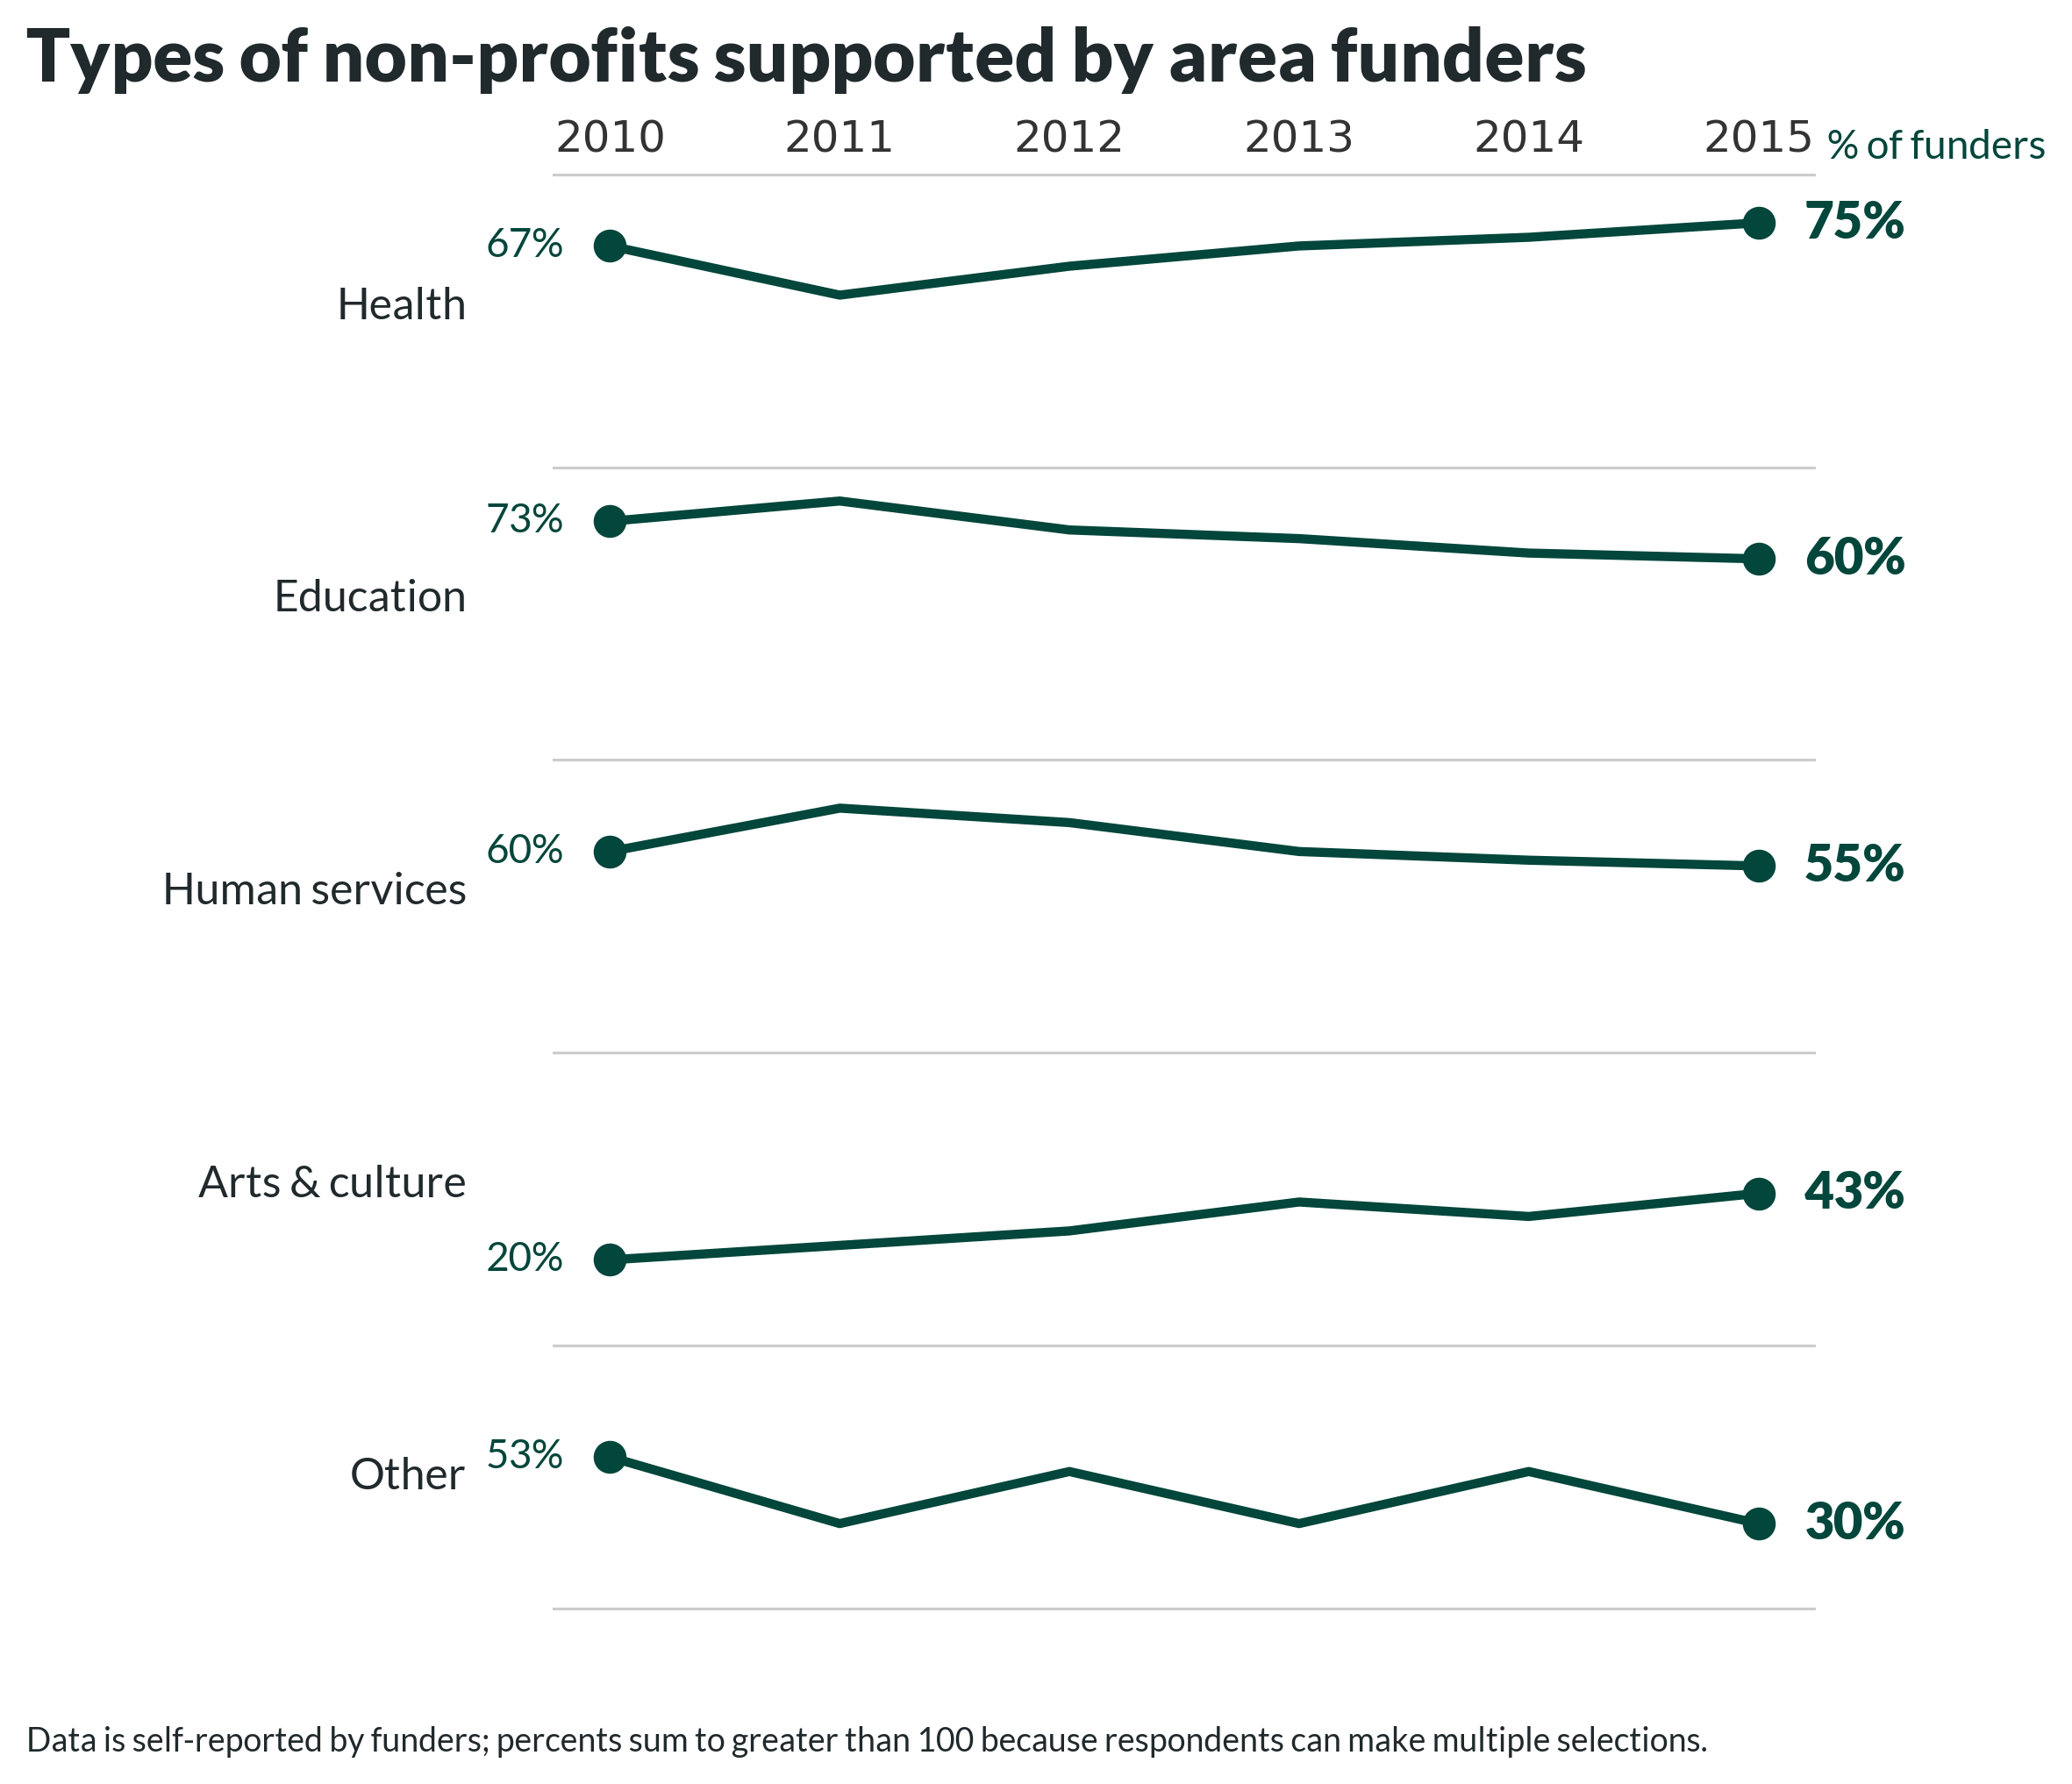

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from style_config import COLORS, TEXT_STYLES, BASE_FONT, BOLD_FONT

def plot_small_multiples(data, time_col, category_cols, 
                         title=None, footer=None, unit_label=None):
    """
    Generates a small multiples line chart with start/end markers and annotations.
    
    Parameters:
    - data: DataFrame containing the data.
    - time_col: Name of the column for the x-axis (e.g., 'year').
    - category_cols: List of column names to plot as separate rows.
    - title: Main chart title.
    - footer: Footer text.
    - unit_label: Text to appear at the top right (e.g., "% of funders").
    """
    
    # --- 1. PREP & CALCULATIONS ---
    # Construct layout list dynamically based on provided categories
    layout = [[col] for col in category_cols]
    
    # Calculate Global Y-Limits for consistent scaling
    # Find max across all specific category columns
    global_max = data[category_cols].max().max()
    global_min = 0 # Assuming 0 baseline is desired, or use data[category_cols].min().min()
    
    # Add ~15% padding to the top for annotations
    y_limit_max = global_max * 1.15
    
    start_time = data[time_col].min()
    end_time = data[time_col].max()
    
    # Identify top and bottom plots for specific styling
    top_key = category_cols[0]
    bottom_key = category_cols[-1]

    # --- 2. FIGURE SETUP ---
    # Dynamic height based on number of categories (approx 1.4 inches per row)
    fig_height = len(category_cols) * 1.4
    
    fig, ax = plt.subplot_mosaic(layout,
                                 figsize=(8, fig_height), 
                                 gridspec_kw={'height_ratios': [1]*len(category_cols), 'hspace': 0.1}, 
                                 sharex=True,
                                 dpi=300)

    if title:
        fig.suptitle(title,
                     ha='left', x=0.00, y=0.96, **TEXT_STYLES['heading'])

    # --- 3. PLOTTING LOOP ---
    for key in category_cols:
        axes = ax[key]
        values = data[key]
        times = data[time_col]
        
        # A. Plot Line
        axes.plot(times, values, color=COLORS['primary'], linewidth=2.5, zorder=3)
        
        # B. Plot Markers (Start and End only)
        start_val = values.iloc[0]
        end_val = values.iloc[-1]
        axes.plot([start_time, end_time], [start_val, end_val], 
                  'o', color=COLORS['primary'], markersize=8, zorder=4)

        # C. Annotations (Values)
        axes.text(start_time - 0.2, start_val, f'{int(start_val)}%', 
                  ha='right', va='center', fontsize=11, fontproperties=BASE_FONT, color=COLORS['primary'])
        axes.text(end_time + 0.2, end_val, f'{int(end_val)}%', 
                  ha='left', va='center', fontsize=14, fontproperties=BOLD_FONT, color=COLORS['primary'], fontweight='bold')

        # D. Styling & Spines
        axes.set_ylim(global_min, y_limit_max)
        for spine in axes.spines.values(): spine.set_visible(False)
        
        # E. Grid/Separator Lines
        # Top separator for everyone
        axes.axhline(y_limit_max, color='#cccccc', linewidth=1.5, zorder=1)
        # Bottom separator only for the last chart
        if key == bottom_key:
            axes.axhline(0, color='#cccccc', linewidth=1.5, zorder=1)

        # F. Y-Label (Category Name)
        axes.set_ylabel(key, rotation=0, ha='right', va='center', 
                        labelpad=20, **TEXT_STYLES['tick_label'])

        # G. Axis Tick Management
        axes.tick_params(axis='y', length=0)
        axes.set_yticklabels([])
        
        # Force ticks to top and DISABLE bottom for all plots to prevent duplication
        axes.xaxis.tick_top()
        axes.tick_params(axis='x', bottom=False, labelbottom=False)
        
        # Only enable top ticks for the very first plot
        if key == top_key:
            axes.tick_params(axis='x', top=True, labeltop=True, length=0, colors='#333333', labelsize=12)
            
            # Add the unit label (e.g. "% of funders")
            if unit_label:
                axes.text(end_time + 0.3, y_limit_max + (y_limit_max*0.1), unit_label, 
                          color=COLORS['primary'], ha='left', va='center', **TEXT_STYLES['unit_label'])
        else:
            axes.tick_params(axis='x', top=False, labeltop=False)

    # --- 4. FOOTER & LAYOUT ---
    if footer:
        fig.text(0.0, 0.02, footer, ha='left', va='bottom', **TEXT_STYLES['footer_text'])

    # Adjust margins to fit labels on the left and right
    plt.subplots_adjust(left=0.25, right=0.85, top=0.88, bottom=0.1)
    
    return fig, ax

# --- USAGE EXAMPLE ---

# 1. Setup Data
non_profits = pd.DataFrame({
    'year': [2010, 2011, 2012, 2013, 2014, 2015],
    'Health': [67, 50, 60, 67, 70, 75],
    'Education': [73, 80, 70, 67, 62, 60],
    'Human services': [60, 75, 70, 60, 57, 55],
    'Arts & culture': [20, 25, 30, 40, 35, 43],
    'Other': [53, 30, 48, 30, 48, 30]
})

print(non_profits)

# 2. Define Columns
categories = ['Health', 'Education', 'Human services', 'Arts & culture', 'Other']
footer_text = "Data is self-reported by funders; percents sum to greater than 100 because respondents can make multiple selections."

# 3. Call Function
plot_small_multiples(
    data=non_profits,
    time_col='year',
    category_cols=categories,
    title="Types of non-profits supported by area funders",
    footer=footer_text,
    unit_label="% of funders",
)

plt.show()